In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.impute import SimpleImputer

print(pd.__version__)


1.0.1


In [2]:
df = pd.read_csv('Data/covid_19_data.csv')
df.head(10)

SNo ObservationDate Province/State  Country/Region      Last Update  \
0    1      01/22/2020          Anhui  Mainland China  1/22/2020 17:00   
1    2      01/22/2020        Beijing  Mainland China  1/22/2020 17:00   
2    3      01/22/2020      Chongqing  Mainland China  1/22/2020 17:00   
3    4      01/22/2020         Fujian  Mainland China  1/22/2020 17:00   
4    5      01/22/2020          Gansu  Mainland China  1/22/2020 17:00   
5    6      01/22/2020      Guangdong  Mainland China  1/22/2020 17:00   
6    7      01/22/2020        Guangxi  Mainland China  1/22/2020 17:00   
7    8      01/22/2020        Guizhou  Mainland China  1/22/2020 17:00   
8    9      01/22/2020         Hainan  Mainland China  1/22/2020 17:00   
9   10      01/22/2020          Hebei  Mainland China  1/22/2020 17:00   

   Confirmed  Deaths  Recovered  
0        1.0     0.0        0.0  
1       14.0     0.0        0.0  
2        6.0     0.0        0.0  
3        1.0     0.0        0.0  
4        0.0     0.0        0.0  
5       26.0     0.0        0.0  
6        2.0     0.0        0.0  
7        1.0     0.0        0.0  
8        4.0     0.0        0.0  
9        1.0     0.0        0.0

In [3]:
# the SNo and the last update is not needed so we drop them
df.drop(['SNo', 'Last Update'], axis=1, inplace = True)

In [4]:
df.head()

ObservationDate Province/State  Country/Region  Confirmed  Deaths  Recovered
0      01/22/2020          Anhui  Mainland China        1.0     0.0        0.0
1      01/22/2020        Beijing  Mainland China       14.0     0.0        0.0
2      01/22/2020      Chongqing  Mainland China        6.0     0.0        0.0
3      01/22/2020         Fujian  Mainland China        1.0     0.0        0.0
4      01/22/2020          Gansu  Mainland China        0.0     0.0        0.0

In [5]:
#to rename some columns
df.rename(columns={'ObservationDate': 'Date', 'Province/State': 'Province', 'Country/Region': 'Country'}, inplace=True)
df.head()

Date   Province         Country  Confirmed  Deaths  Recovered
0  01/22/2020      Anhui  Mainland China        1.0     0.0        0.0
1  01/22/2020    Beijing  Mainland China       14.0     0.0        0.0
2  01/22/2020  Chongqing  Mainland China        6.0     0.0        0.0
3  01/22/2020     Fujian  Mainland China        1.0     0.0        0.0
4  01/22/2020      Gansu  Mainland China        0.0     0.0        0.0

In [6]:
#converting the date into internal pandas date format
df['Date'] = pd.to_datetime(df['Date'])
df.head()

Date   Province         Country  Confirmed  Deaths  Recovered
0 2020-01-22      Anhui  Mainland China        1.0     0.0        0.0
1 2020-01-22    Beijing  Mainland China       14.0     0.0        0.0
2 2020-01-22  Chongqing  Mainland China        6.0     0.0        0.0
3 2020-01-22     Fujian  Mainland China        1.0     0.0        0.0
4 2020-01-22      Gansu  Mainland China        0.0     0.0        0.0

In [7]:
df.describe()

Confirmed         Deaths      Recovered
count   38622.000000   38622.000000   38622.000000
mean     7239.151546     464.128243    2608.037880
std     26362.747966    2466.120815   15866.954326
min         0.000000       0.000000       0.000000
25%        39.000000       0.000000       0.000000
50%       422.000000       6.000000      24.000000
75%      2612.000000      76.000000     500.000000
max    405843.000000  120183.000000  524855.000000

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38622 entries, 0 to 38621
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       38622 non-null  datetime64[ns]
 1   Province   21115 non-null  object        
 2   Country    38622 non-null  object        
 3   Confirmed  38622 non-null  float64       
 4   Deaths     38622 non-null  float64       
 5   Recovered  38622 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(2)
memory usage: 1.8+ MB


In [9]:
#check if there are null values
df.isna().sum()

Date             0
Province     17507
Country          0
Confirmed        0
Deaths           0
Recovered        0
dtype: int64

In [10]:
#filling the null value
df = df.fillna('NA')
df.isna().sum()
#using the SimpleImputer
#imputer = SimpleImputer(strategy='constant')
# df = pd.DataFrame(imputer.fit_transform(df),columns=df.columns)

Date         0
Province     0
Country      0
Confirmed    0
Deaths       0
Recovered    0
dtype: int64

In [11]:
df.isna().sum()

Date         0
Province     0
Country      0
Confirmed    0
Deaths       0
Recovered    0
dtype: int64

In [12]:
df.head()

Date   Province         Country  Confirmed  Deaths  Recovered
0 2020-01-22      Anhui  Mainland China        1.0     0.0        0.0
1 2020-01-22    Beijing  Mainland China       14.0     0.0        0.0
2 2020-01-22  Chongqing  Mainland China        6.0     0.0        0.0
3 2020-01-22     Fujian  Mainland China        1.0     0.0        0.0
4 2020-01-22      Gansu  Mainland China        0.0     0.0        0.0

In [13]:
# How many total confirmed cases are in each country
#using groupby
df2 = df.groupby('Country')[['Country','Confirmed', 'Deaths','Recovered']].sum().reset_index()

In [14]:
df2

Country  Confirmed   Deaths  Recovered
0                        Azerbaijan        1.0      0.0        0.0
1                   ('St. Martin',)        2.0      0.0        0.0
2                       Afghanistan   422935.0   8758.0    43356.0
3                           Albania    57677.0   2095.0    38145.0
4                           Algeria   375208.0  32638.0   192497.0
..                              ...        ...      ...        ...
218                  Western Sahara      433.0     15.0      270.0
219                           Yemen     8226.0   1734.0      329.0
220                          Zambia    30593.0    319.0    17384.0
221                        Zimbabwe     4837.0    255.0      822.0
222  occupied Palestinian territory       25.0      0.0        0.0

[223 rows x 4 columns]

In [15]:
#to group by country and then date
df2 = df.groupby(['Country', 'Date'])[['Country','Date','Confirmed', 'Deaths','Recovered']].sum().reset_index()

In [16]:
df2

Country       Date  Confirmed  Deaths  Recovered
0                          Azerbaijan 2020-02-28        1.0     0.0        0.0
1                     ('St. Martin',) 2020-03-10        2.0     0.0        0.0
2                         Afghanistan 2020-02-24        1.0     0.0        0.0
3                         Afghanistan 2020-02-25        1.0     0.0        0.0
4                         Afghanistan 2020-02-26        1.0     0.0        0.0
...                               ...        ...        ...     ...        ...
18686  occupied Palestinian territory 2020-03-12        0.0     0.0        0.0
18687  occupied Palestinian territory 2020-03-14        0.0     0.0        0.0
18688  occupied Palestinian territory 2020-03-15        0.0     0.0        0.0
18689  occupied Palestinian territory 2020-03-16        0.0     0.0        0.0
18690  occupied Palestinian territory 2020-03-17        0.0     0.0        0.0

[18691 rows x 5 columns]

In [17]:
# all the records for which the confirm cases are more than 100
df3=df2[df2['Confirmed']>10000]

In [18]:
df3

Country       Date  Confirmed  Deaths  Recovered
92              Afghanistan 2020-05-24    10582.0   218.0     1075.0
93              Afghanistan 2020-05-25    11173.0   219.0     1097.0
94              Afghanistan 2020-05-26    11831.0   220.0     1128.0
95              Afghanistan 2020-05-27    12456.0   227.0     1138.0
96              Afghanistan 2020-05-28    13036.0   235.0     1209.0
...                     ...        ...        ...     ...        ...
17904  United Arab Emirates 2020-06-05    37642.0   274.0    20337.0
17905  United Arab Emirates 2020-06-06    38268.0   275.0    21061.0
17906  United Arab Emirates 2020-06-07    38808.0   276.0    21806.0
17907  United Arab Emirates 2020-06-08    39376.0   281.0    22275.0
17908  United Arab Emirates 2020-06-09    39904.0   283.0    22740.0

[2804 rows x 5 columns]

In [19]:
# allthe record for Nigeria
df4=df2[df2['Country']=='Nigeria']

In [20]:
df4.sort_values(by='Date', ascending=False)

Country       Date  Confirmed  Deaths  Recovered
12469  Nigeria 2020-06-09    13464.0   365.0     4206.0
12468  Nigeria 2020-06-08    12801.0   361.0     4040.0
12467  Nigeria 2020-06-07    12486.0   354.0     3959.0
12466  Nigeria 2020-06-06    12233.0   342.0     3826.0
12465  Nigeria 2020-06-05    11844.0   333.0     3696.0
...        ...        ...        ...     ...        ...
12371  Nigeria 2020-03-03        1.0     0.0        0.0
12370  Nigeria 2020-03-02        1.0     0.0        0.0
12369  Nigeria 2020-03-01        1.0     0.0        0.0
12368  Nigeria 2020-02-29        1.0     0.0        0.0
12367  Nigeria 2020-02-28        1.0     0.0        0.0

[103 rows x 5 columns]

In [21]:
#Converting the sorted data to csv
df4.to_csv('nigeria_covid_data.csv')

In [22]:
#to get all the unique countries
countries = df2['Country'].unique()
len(countries)

223

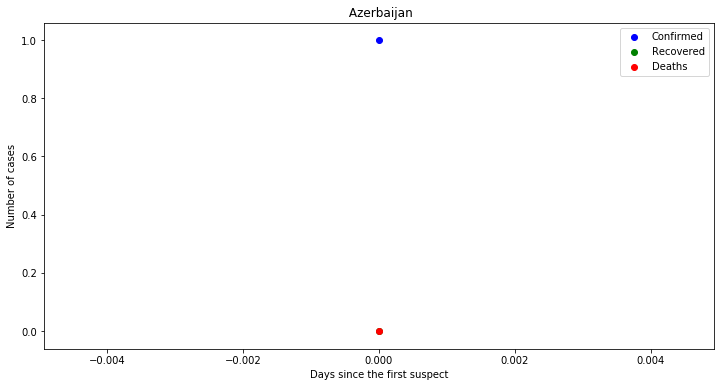

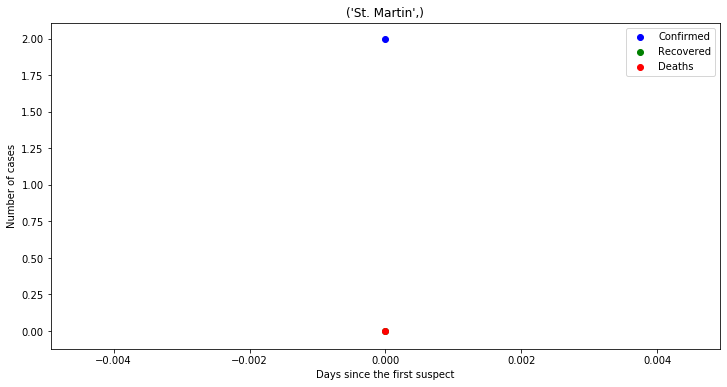

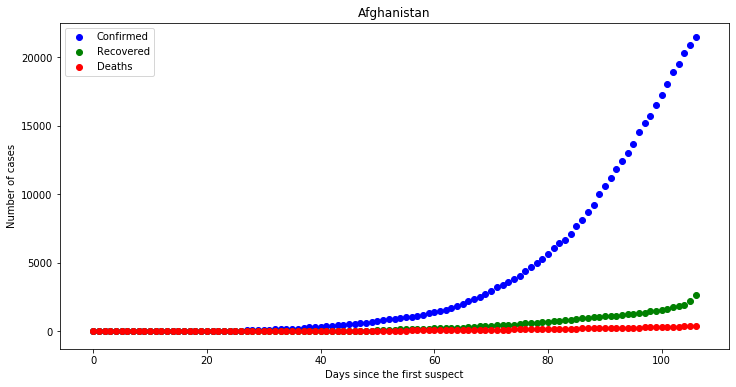

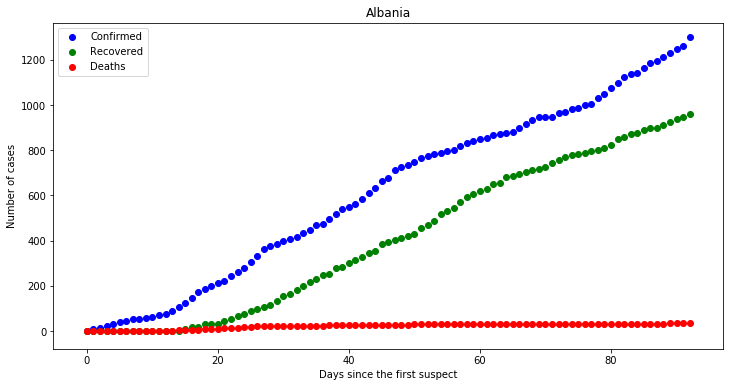

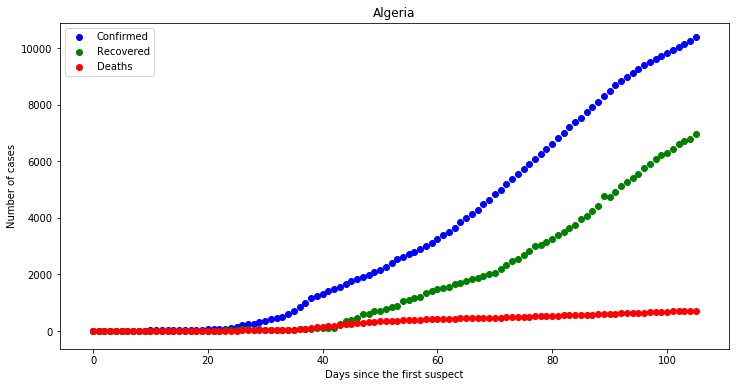

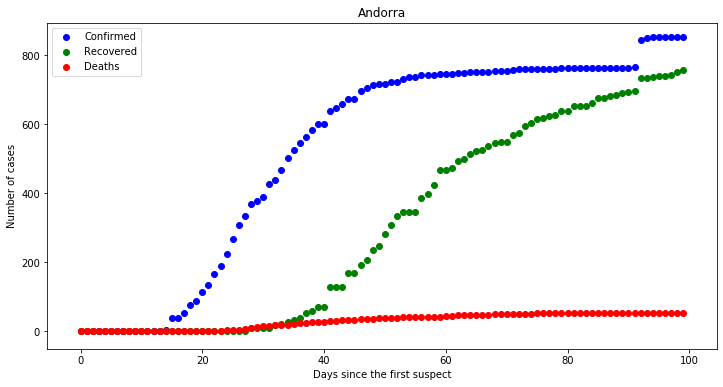

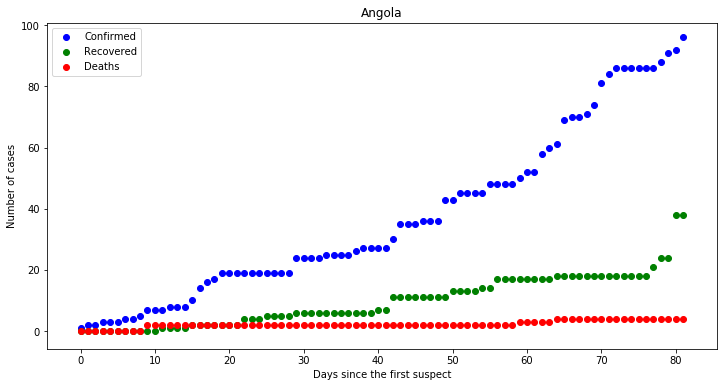

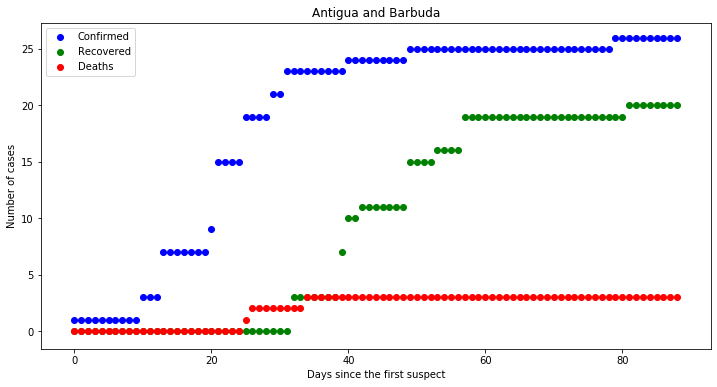

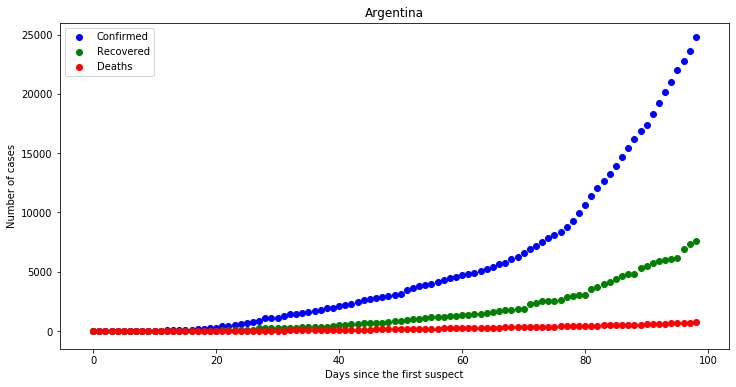

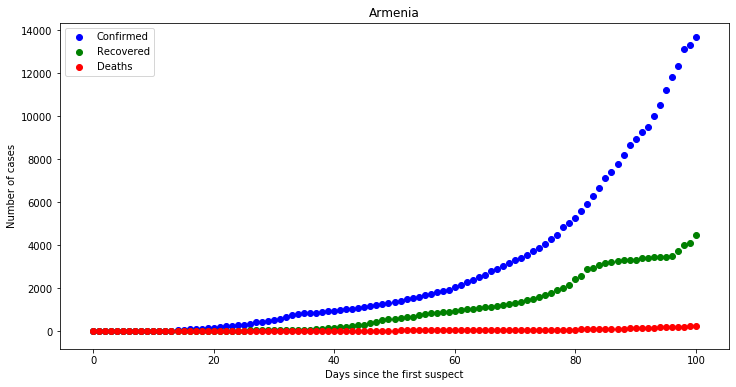

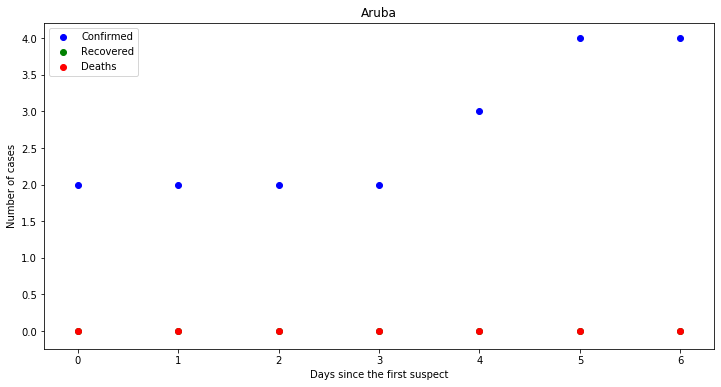

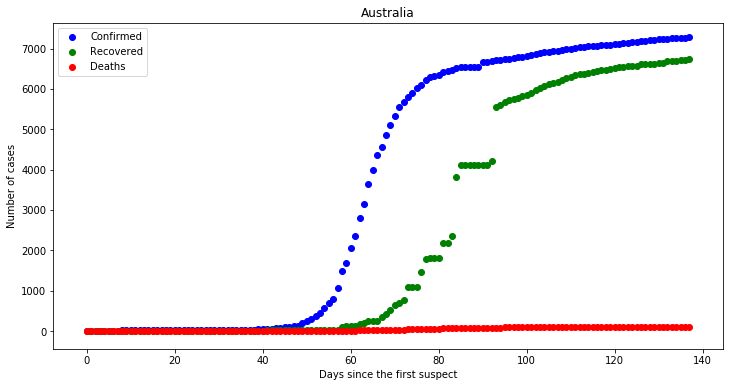

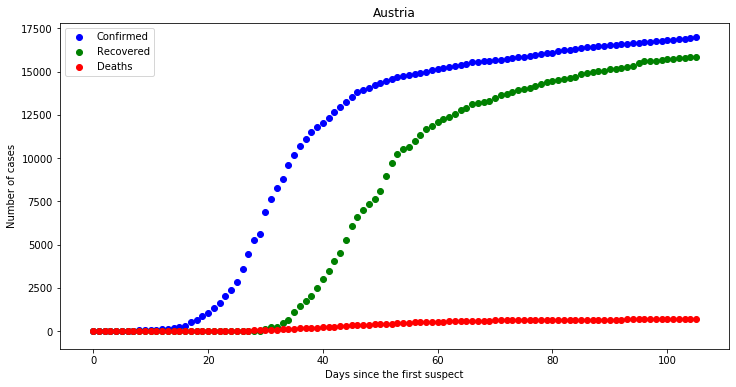

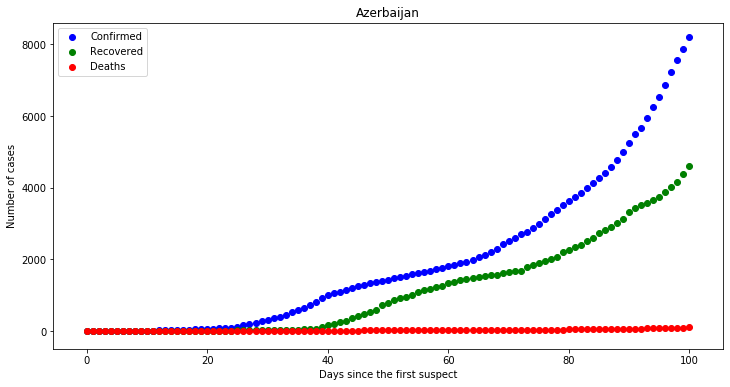

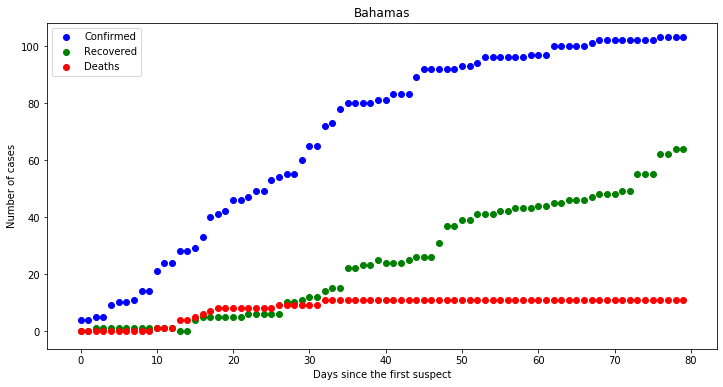

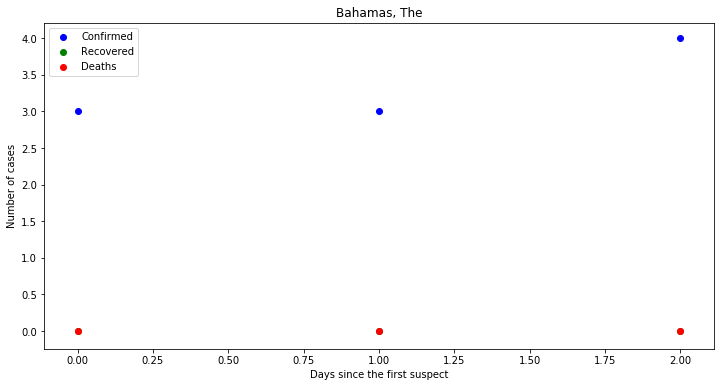

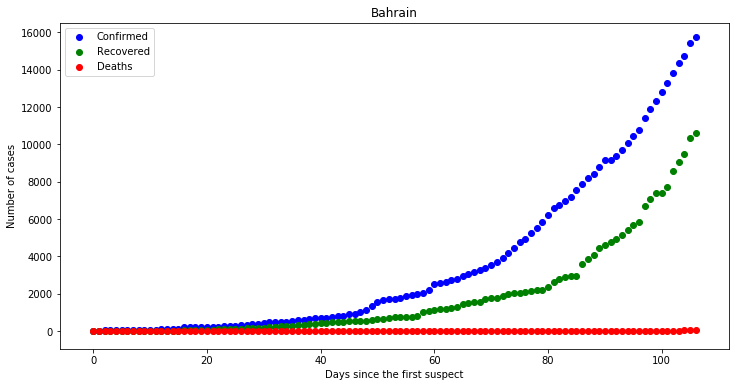

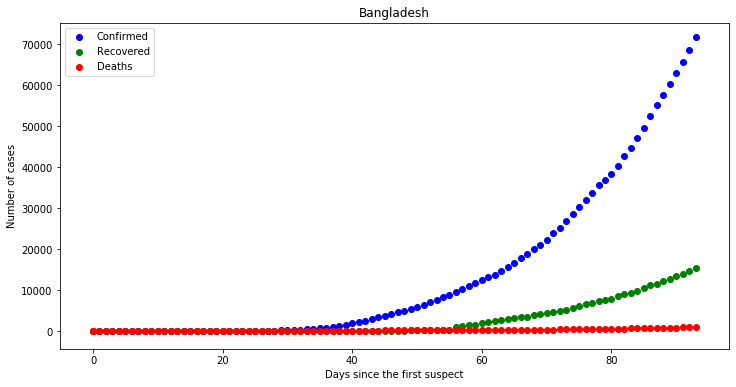

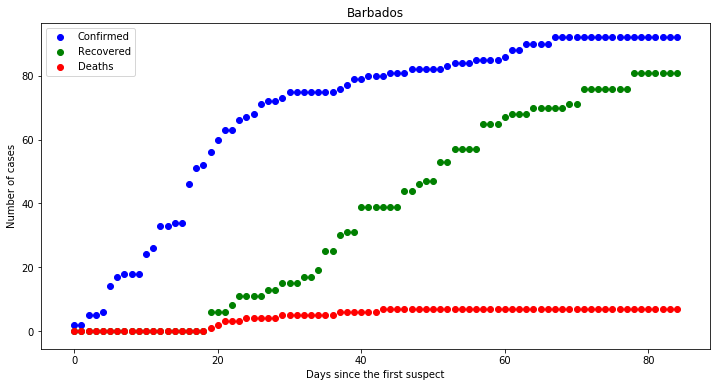

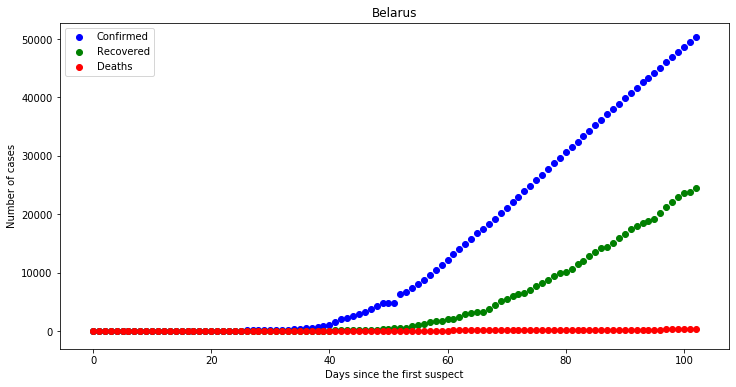

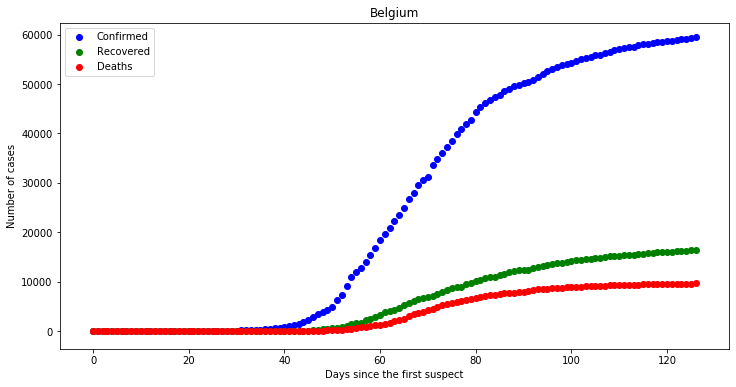

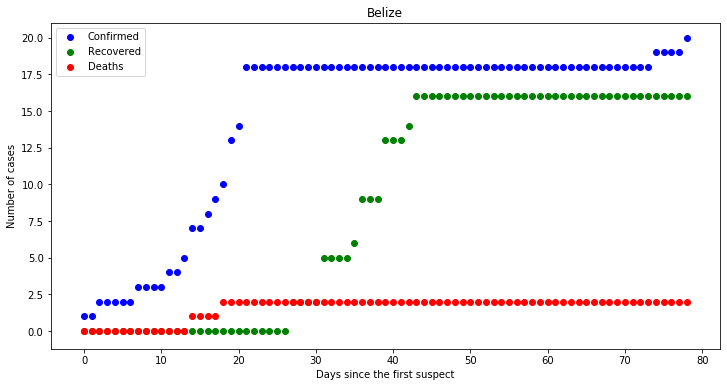

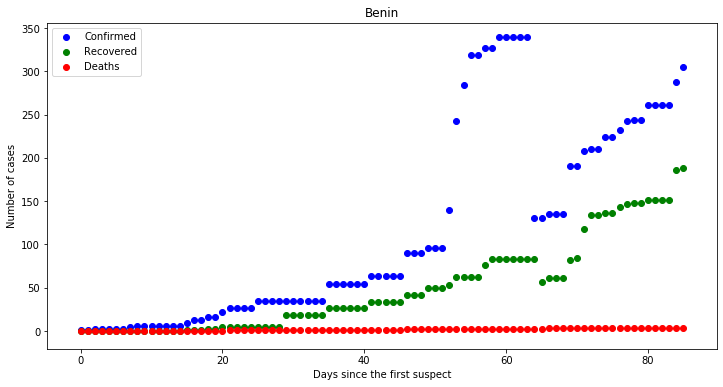

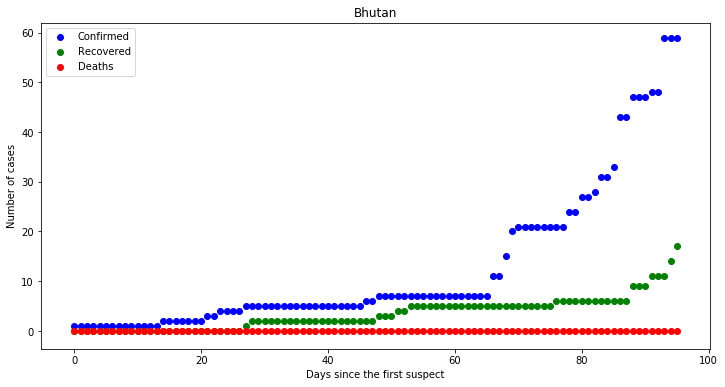

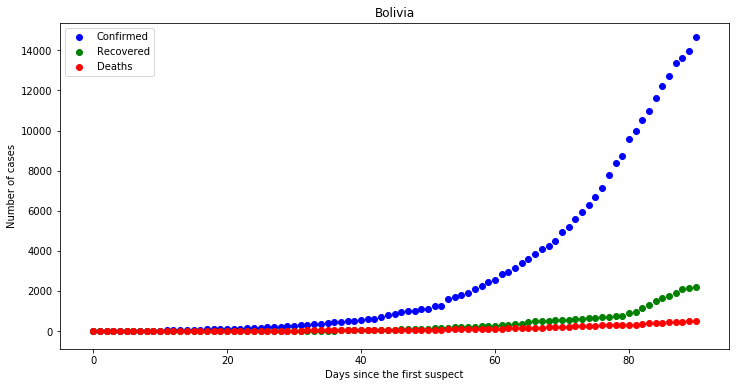

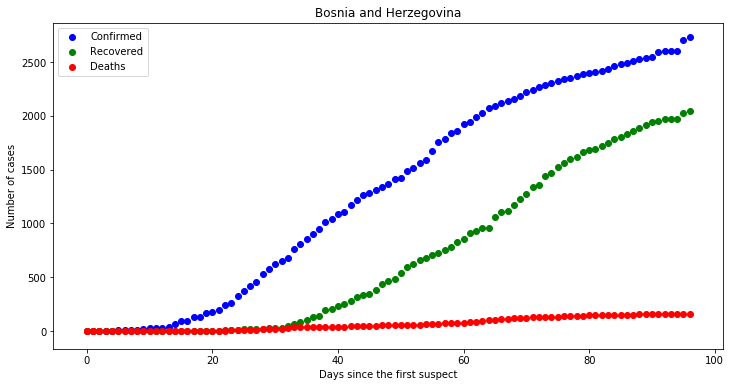

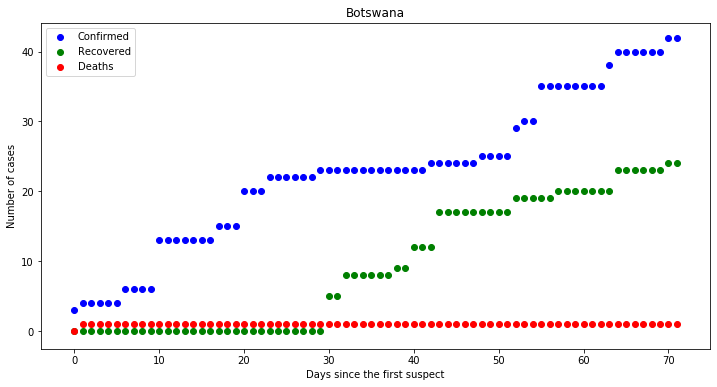

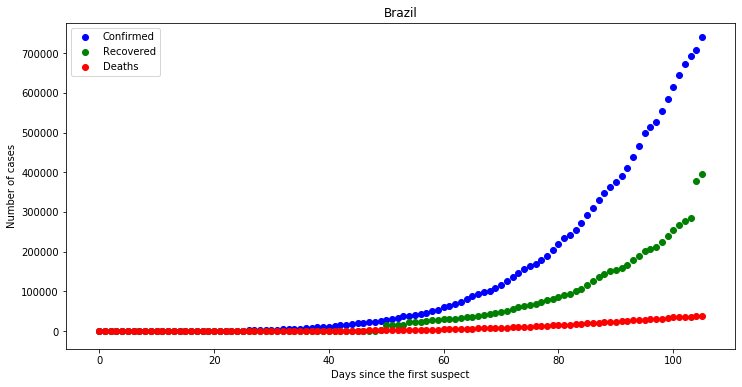

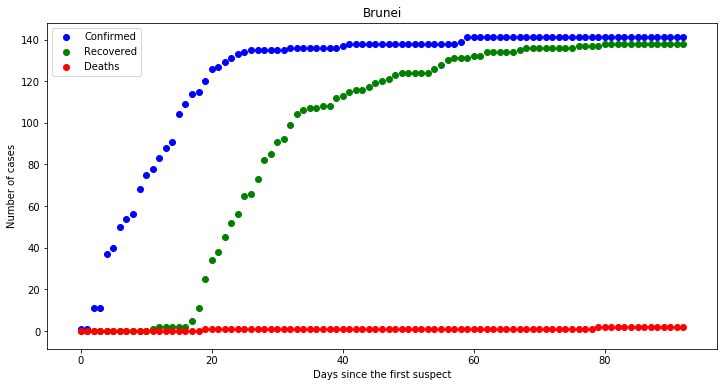

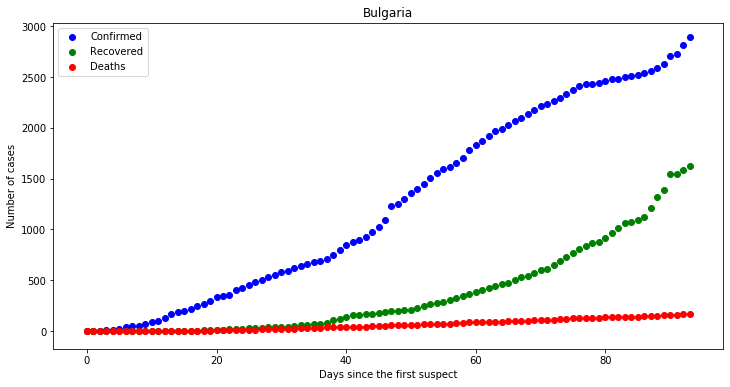

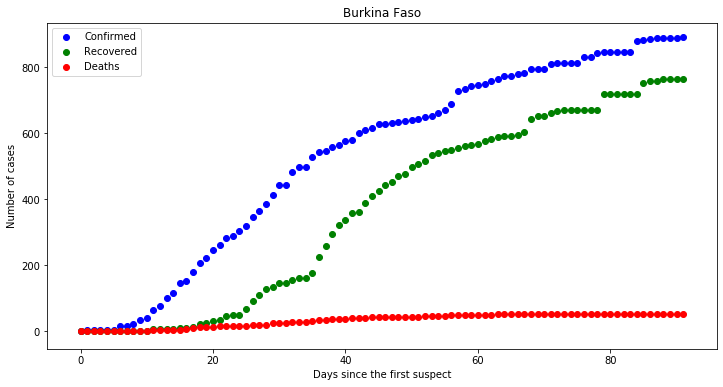

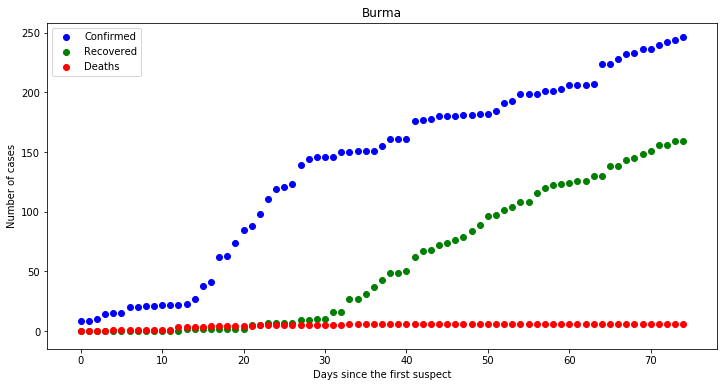

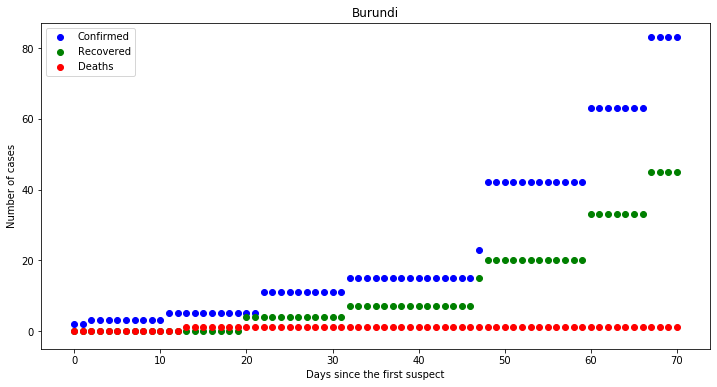

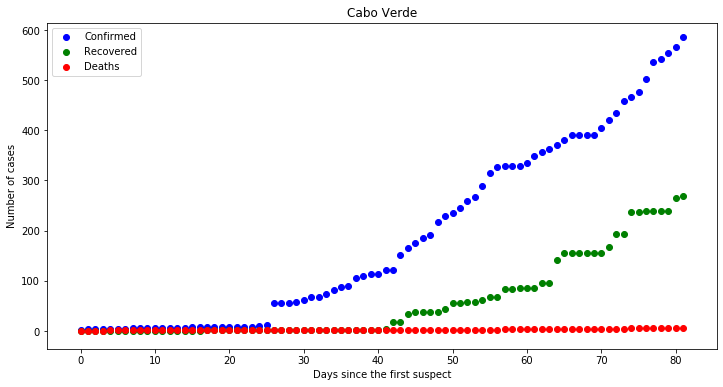

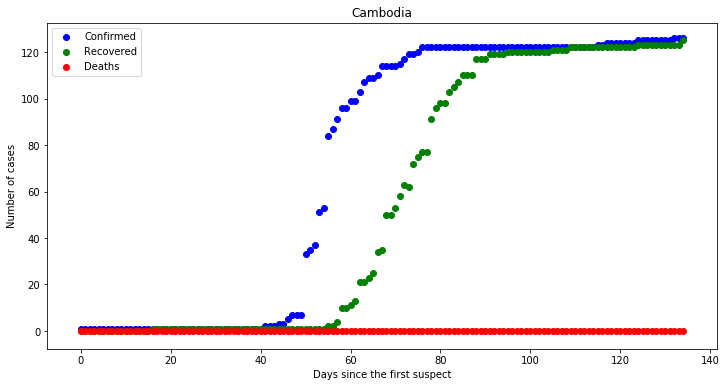

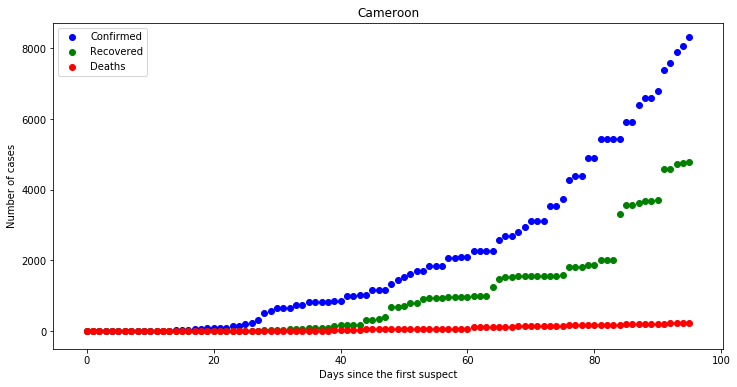

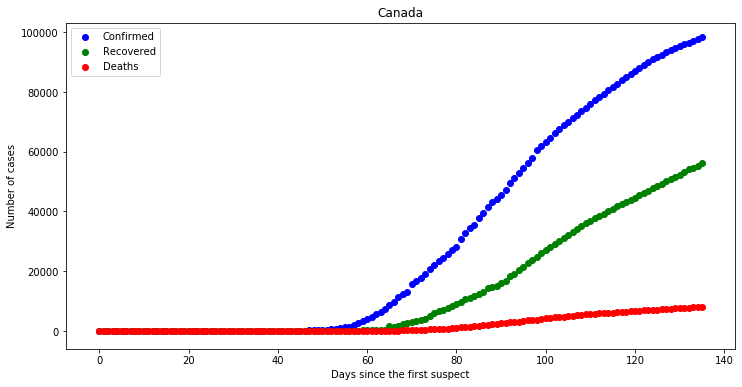

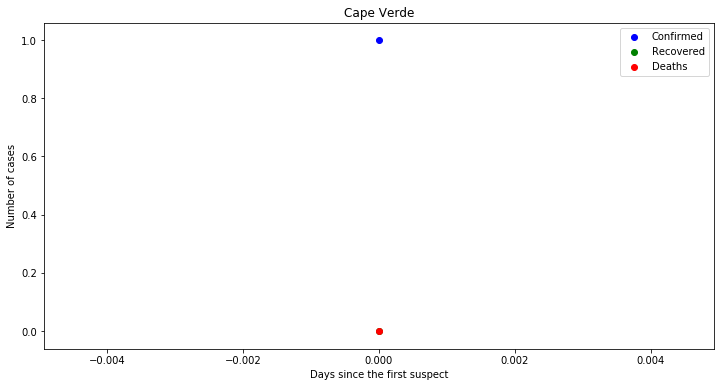

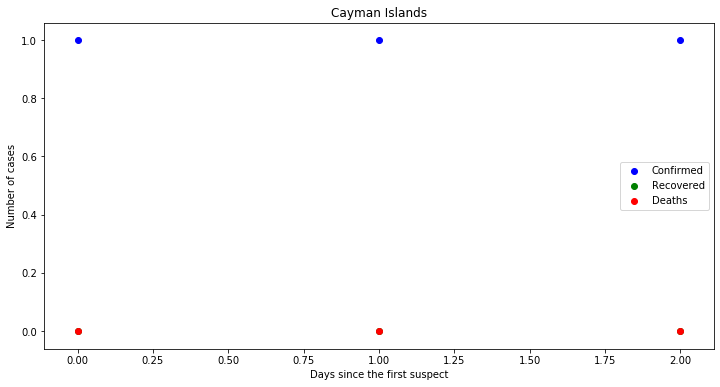

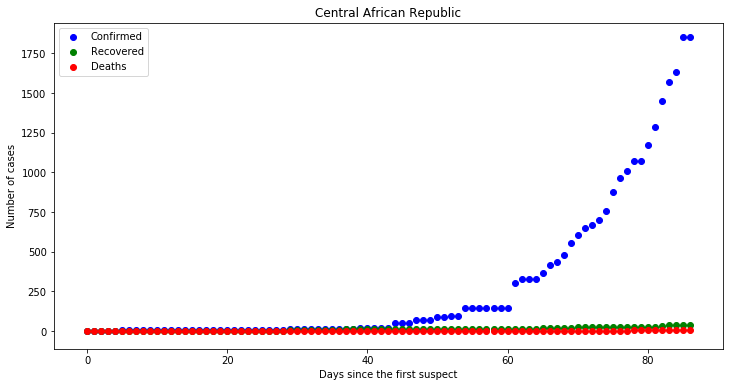

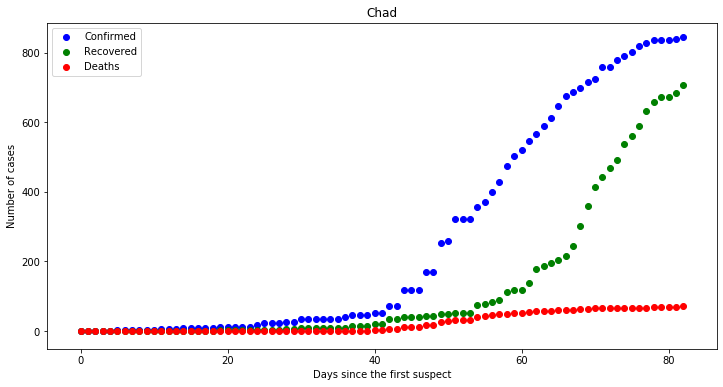

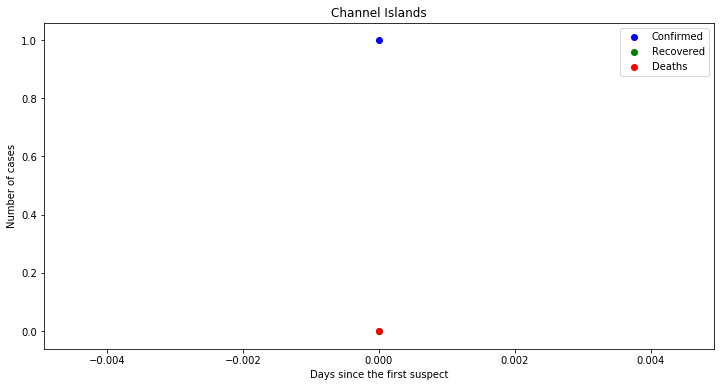

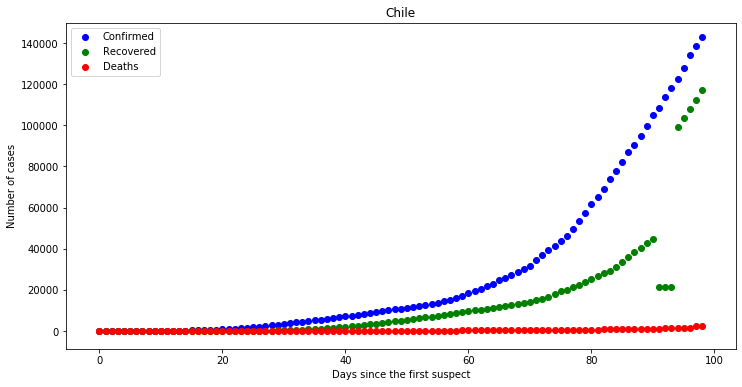

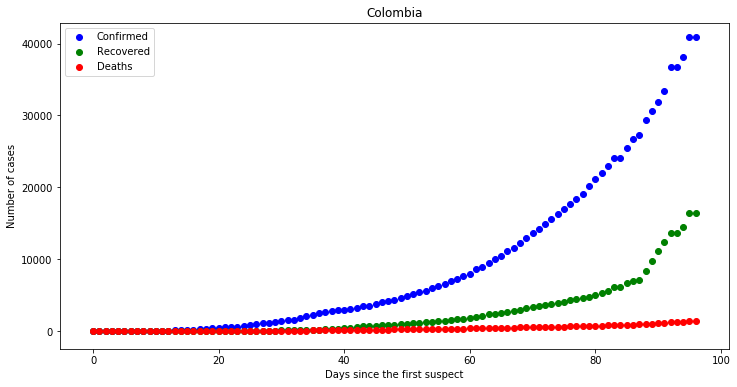

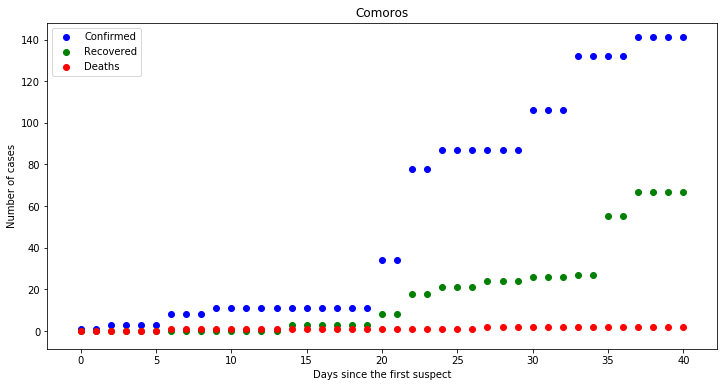

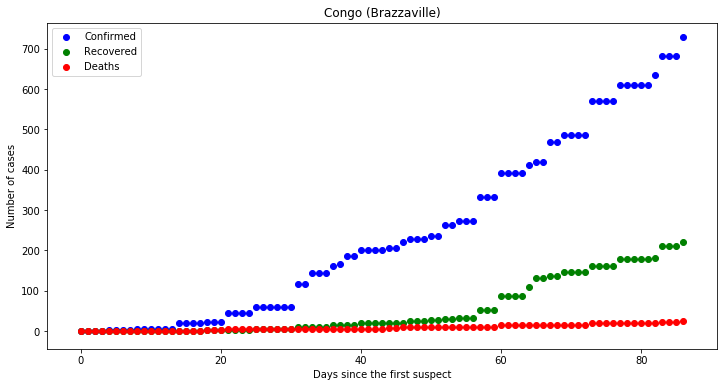

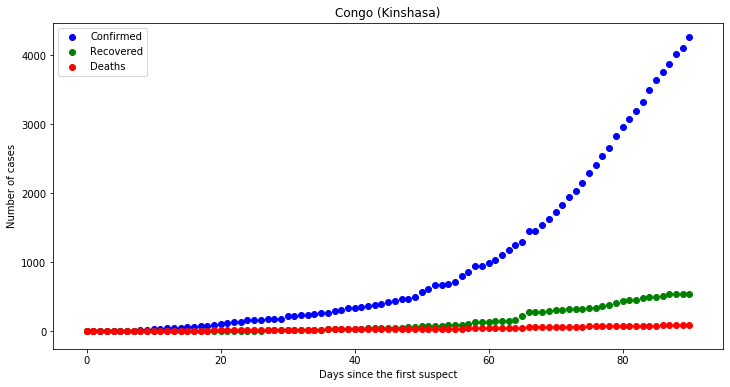

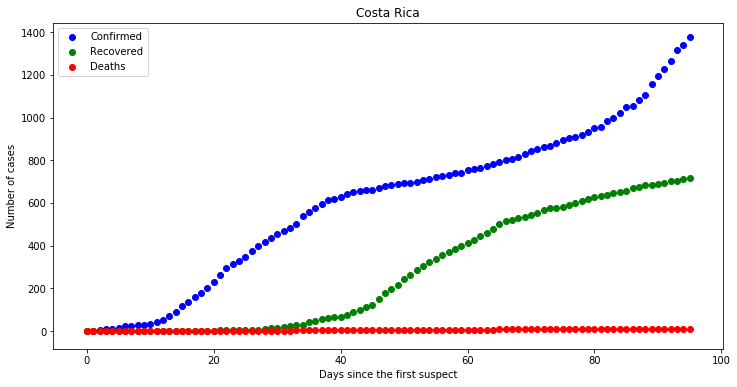

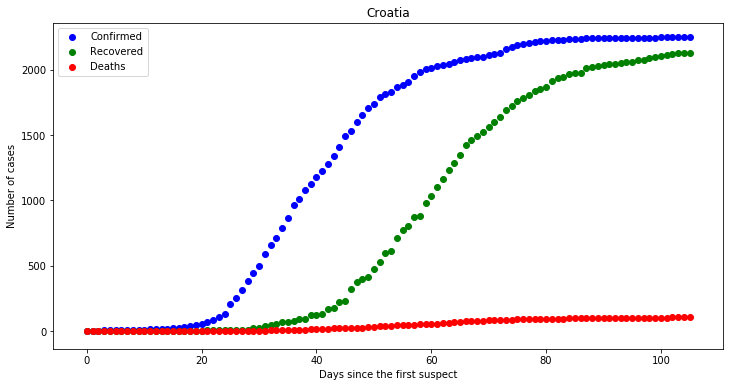

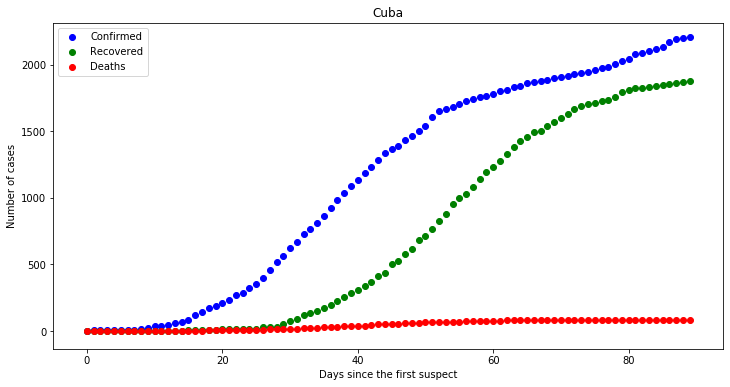

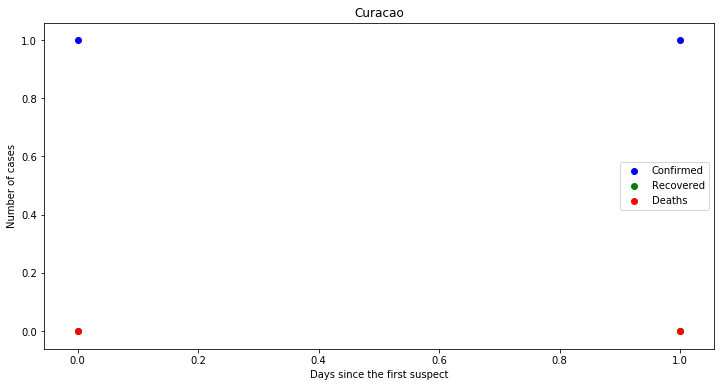

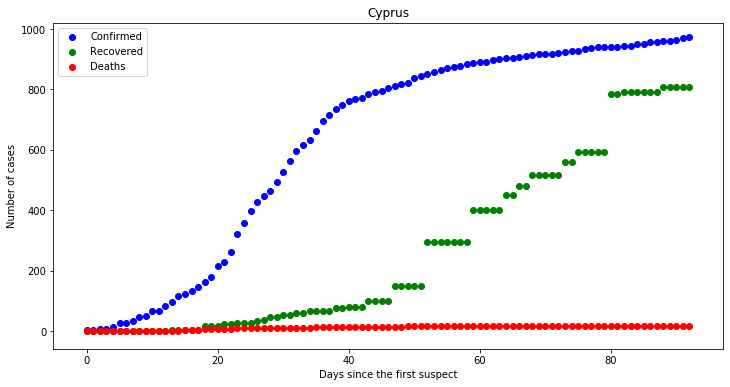

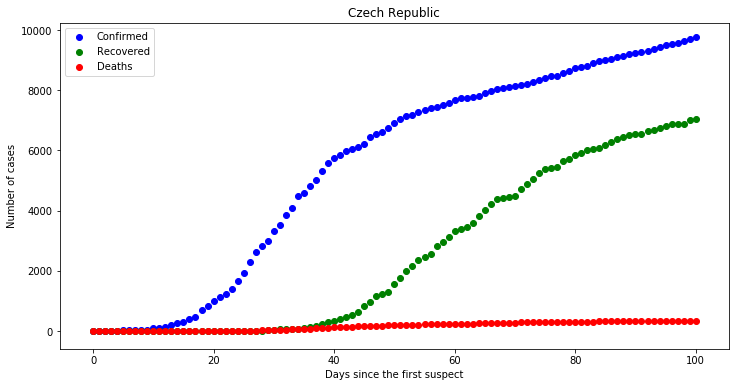

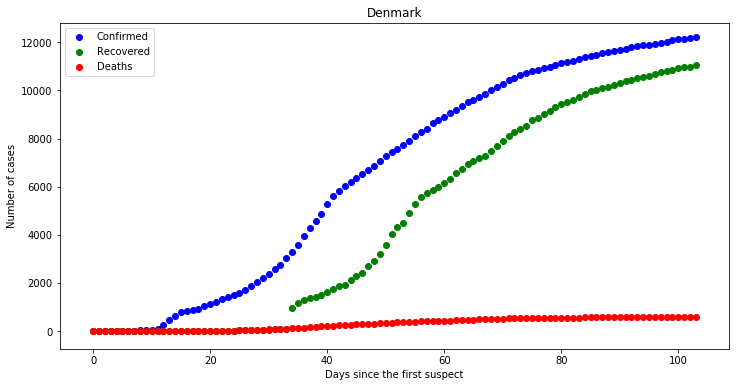

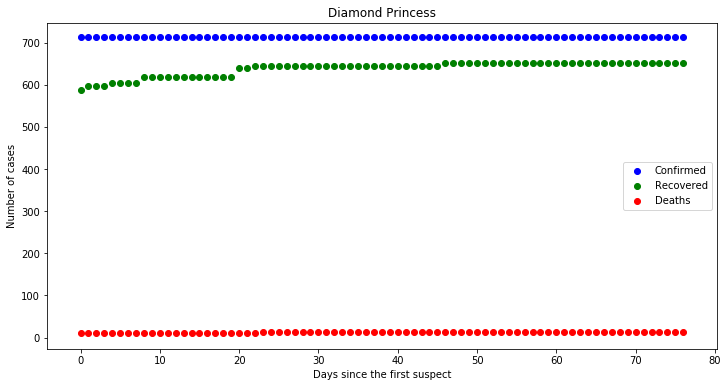

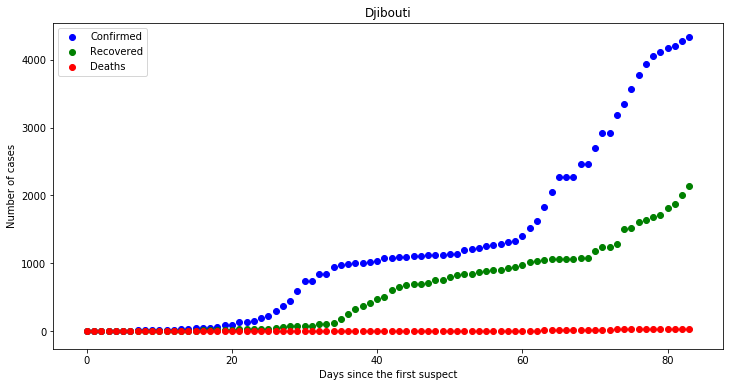

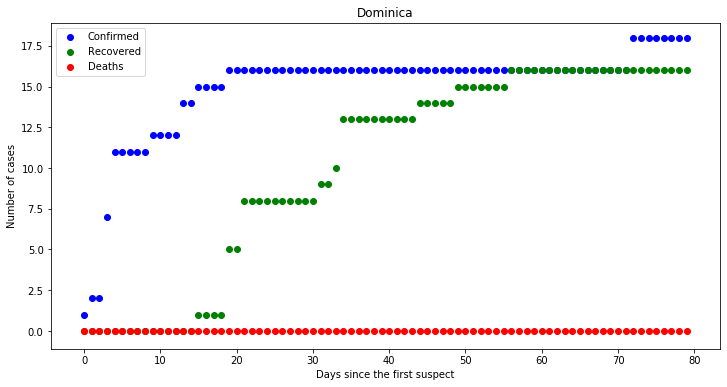

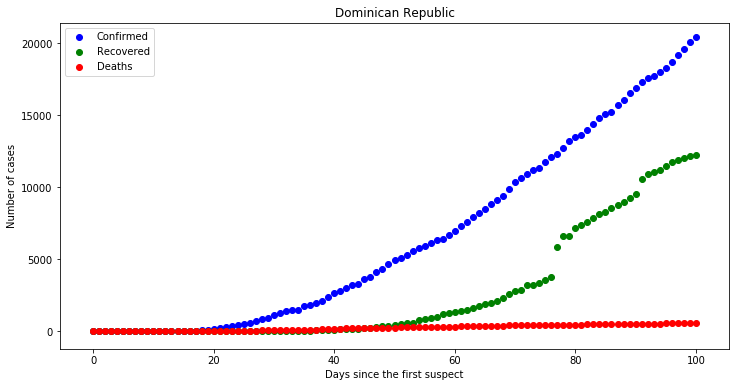

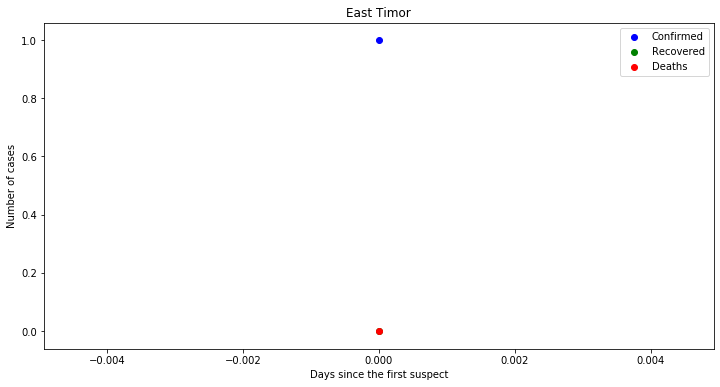

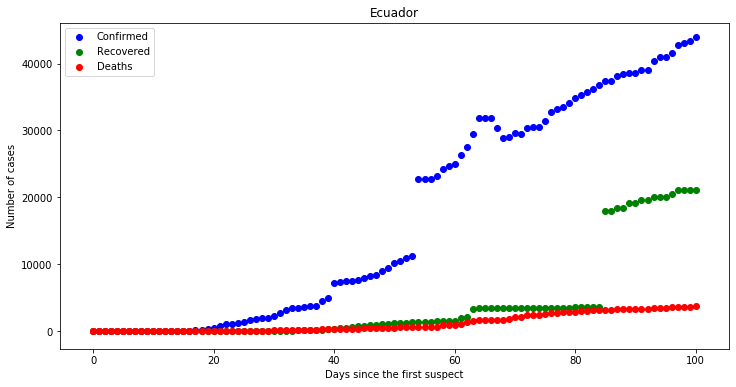

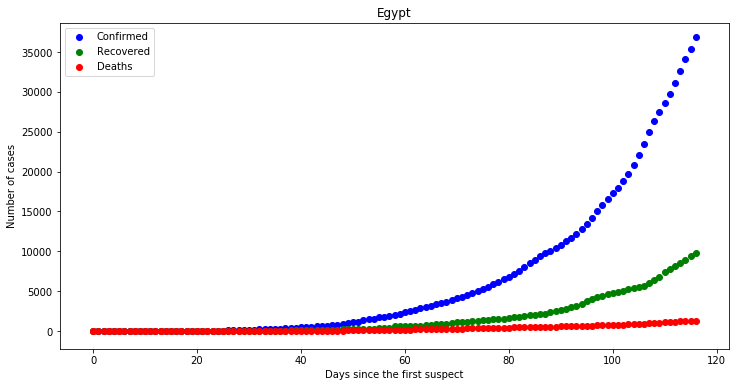

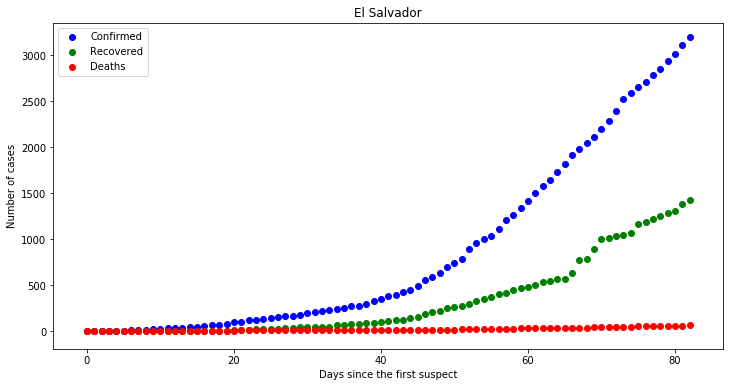

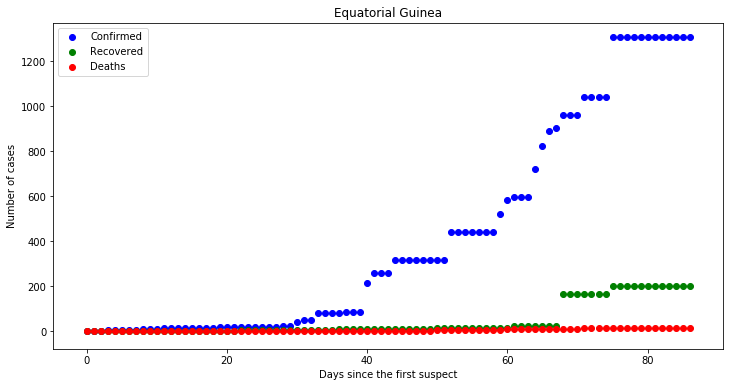

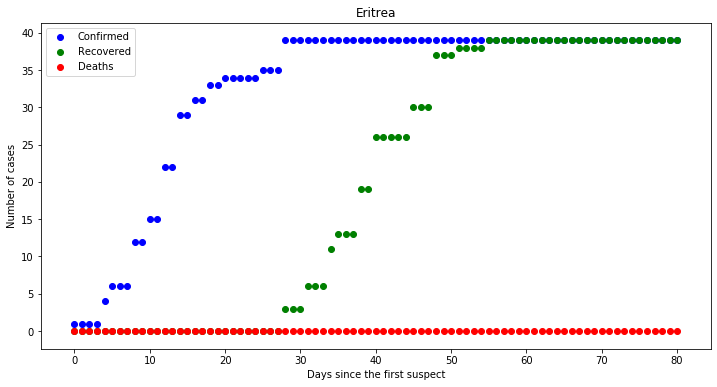

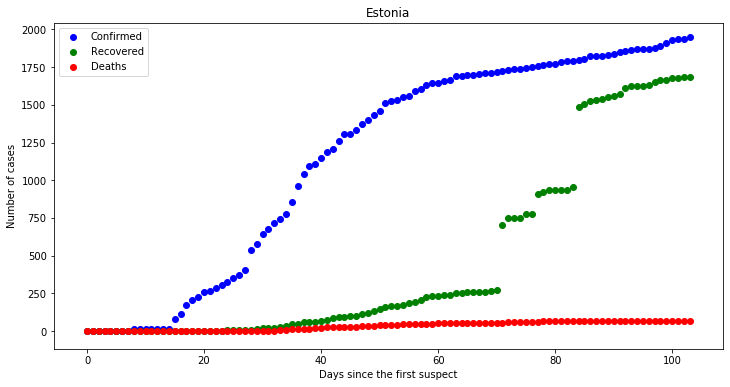

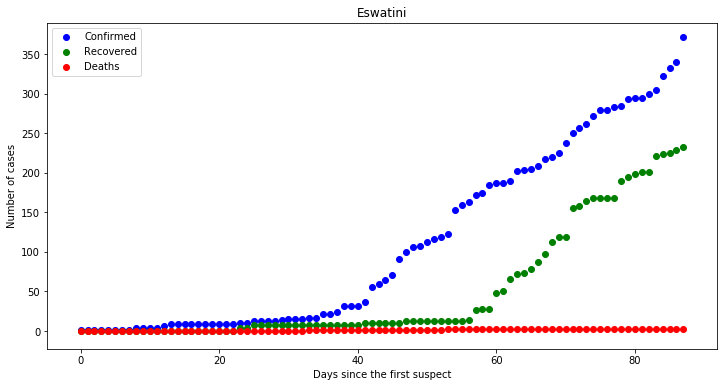

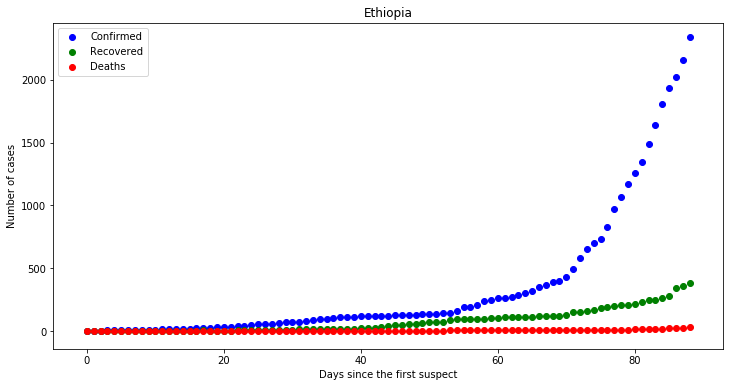

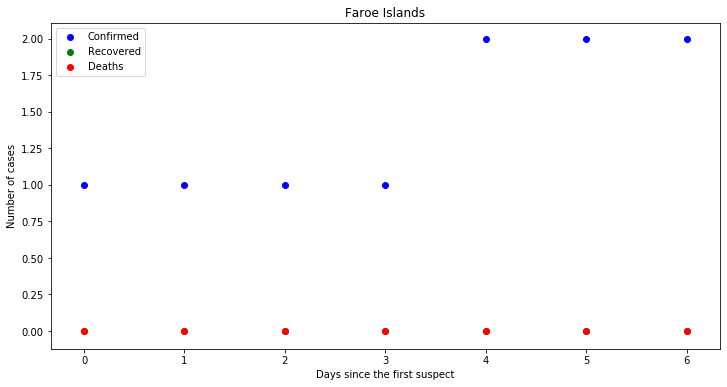

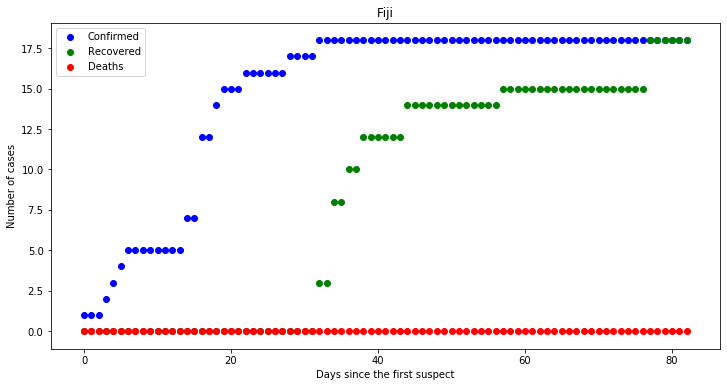

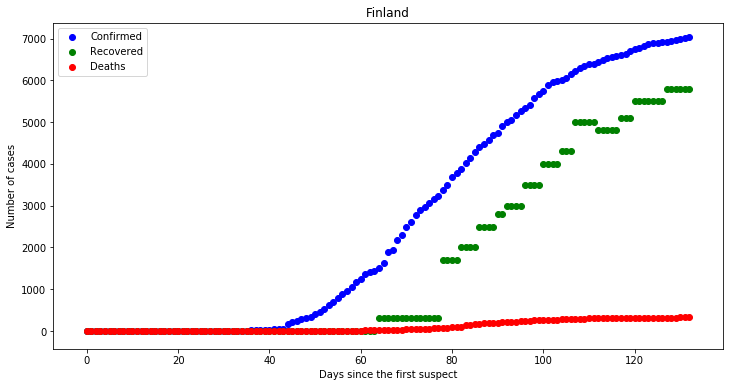

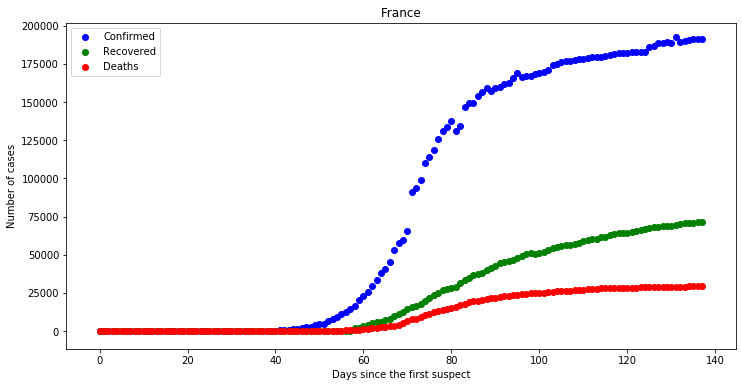

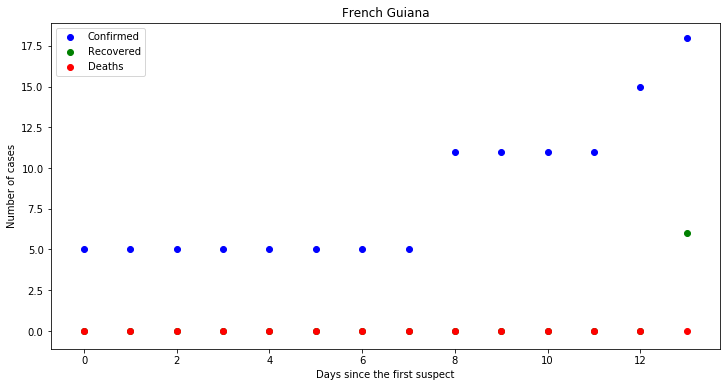

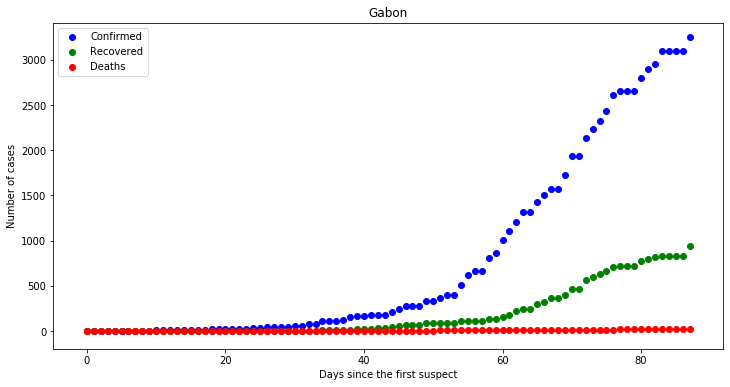

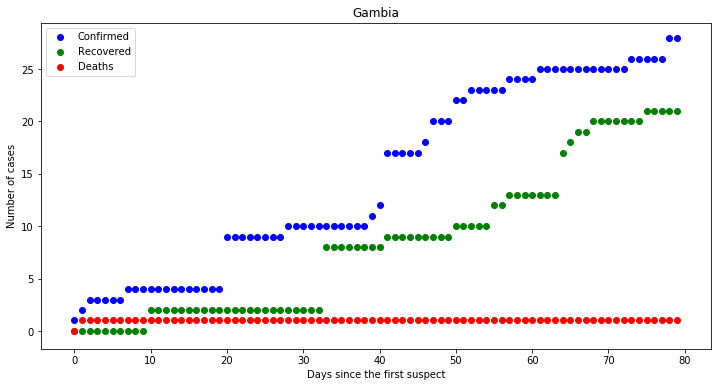

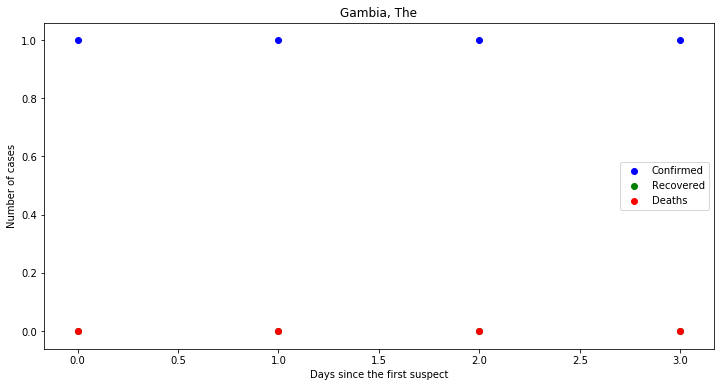

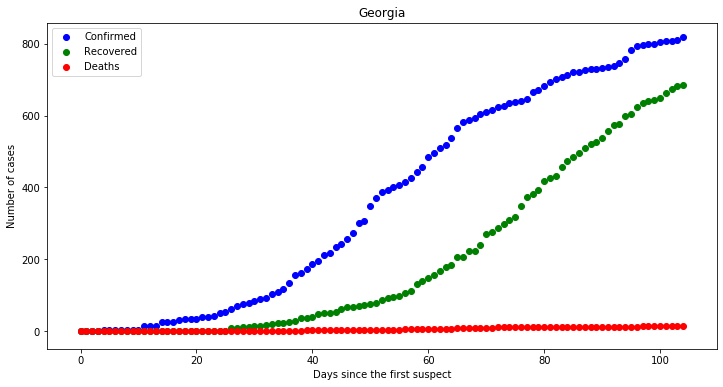

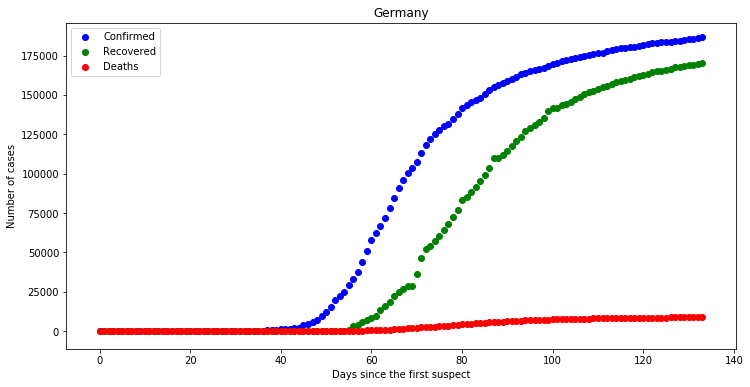

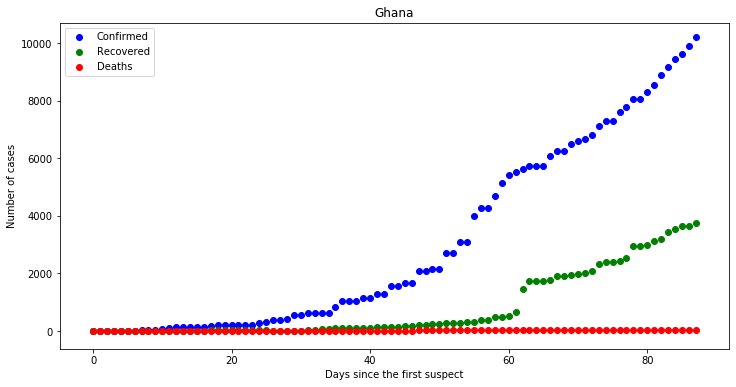

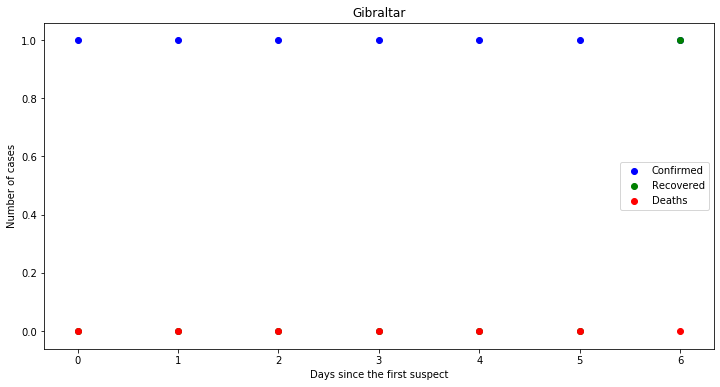

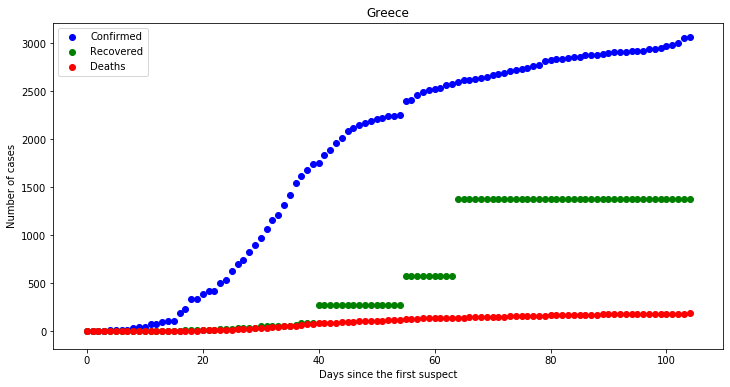

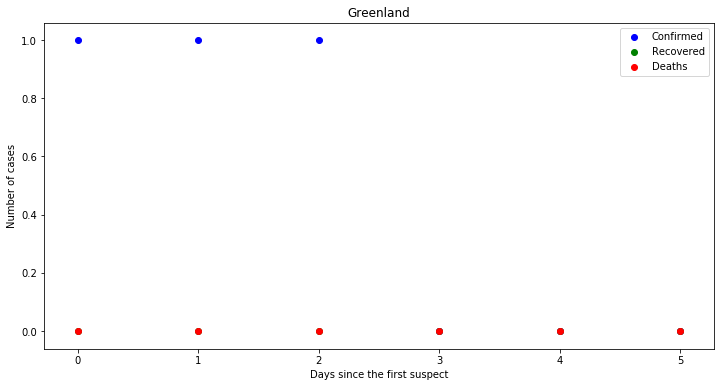

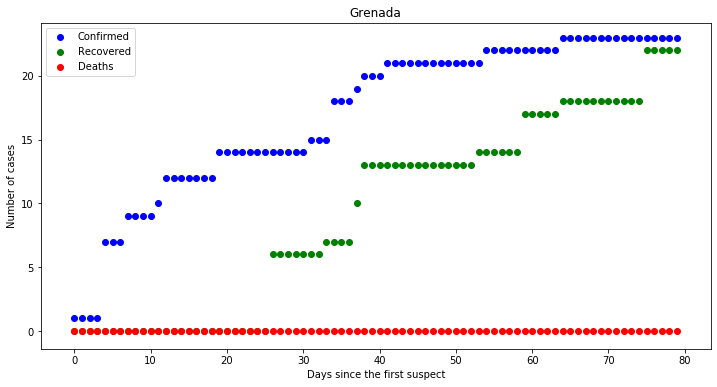

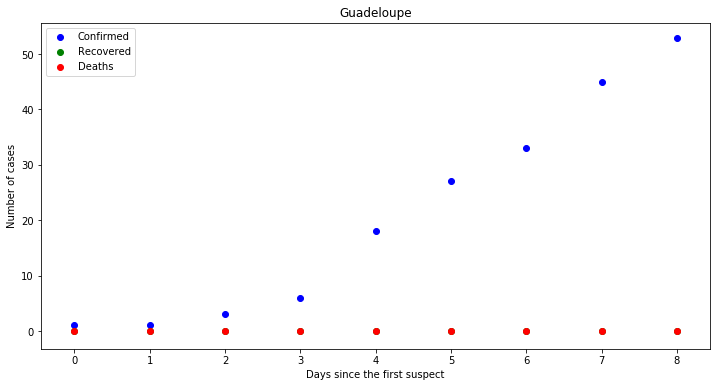

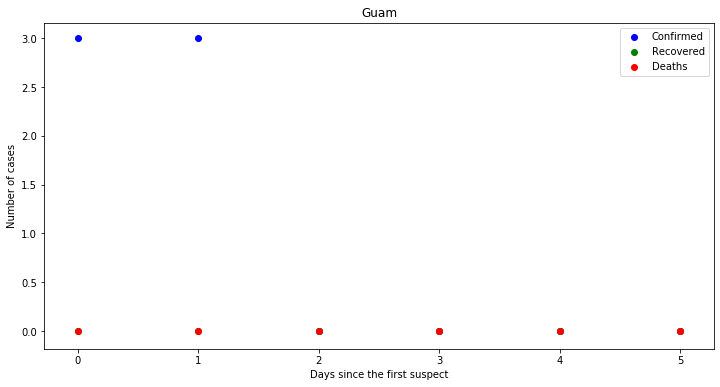

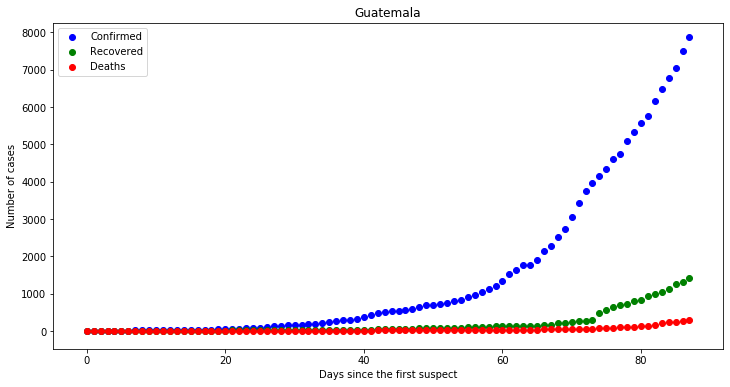

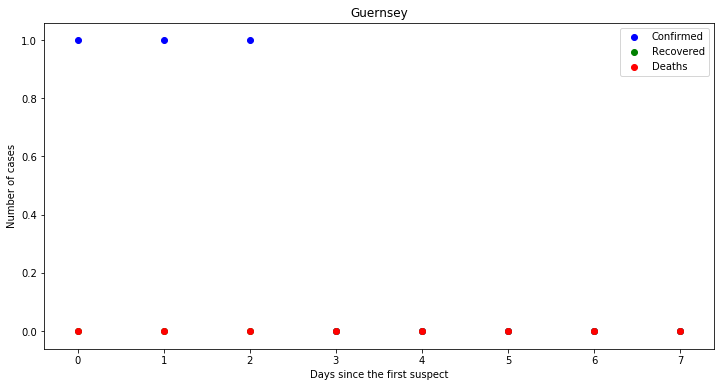

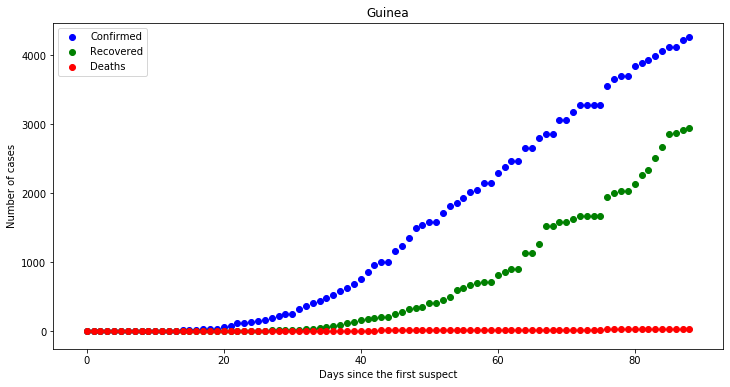

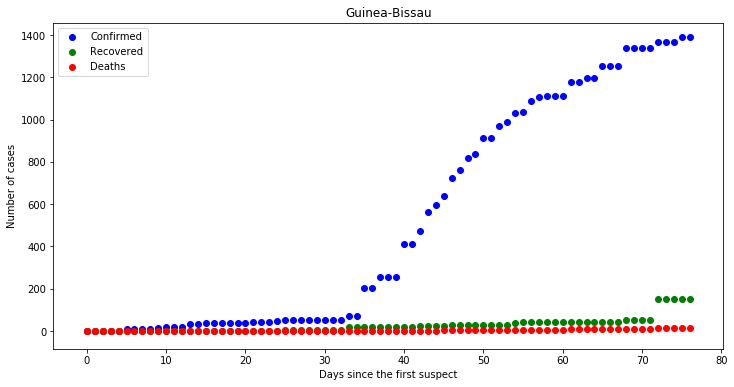

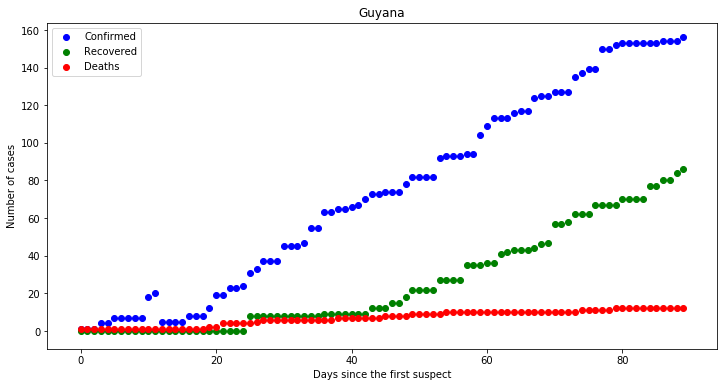

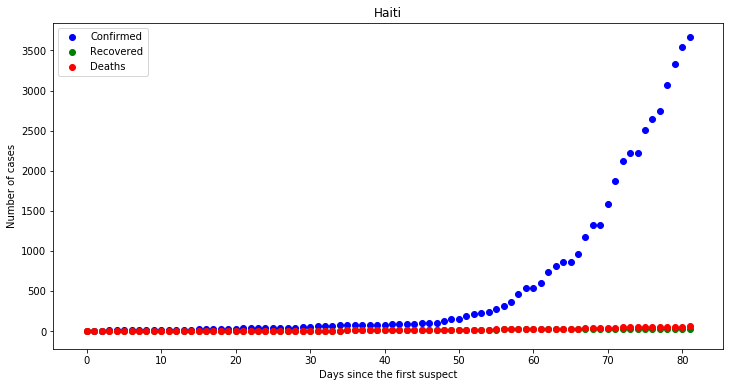

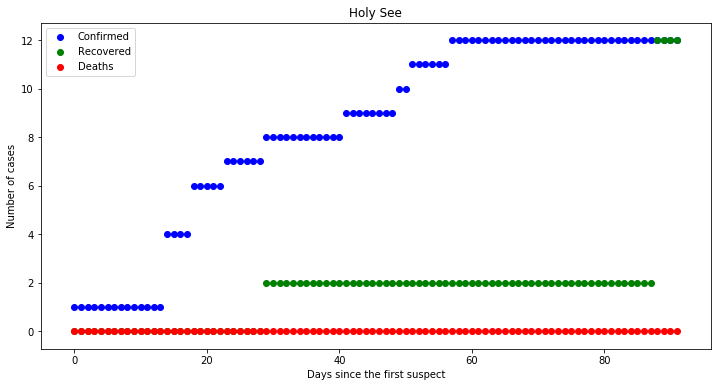

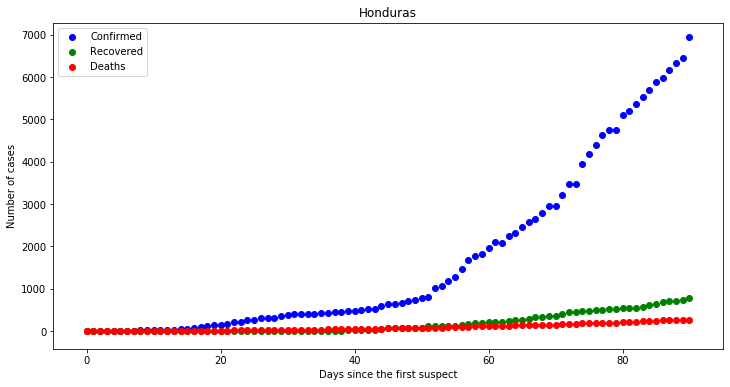

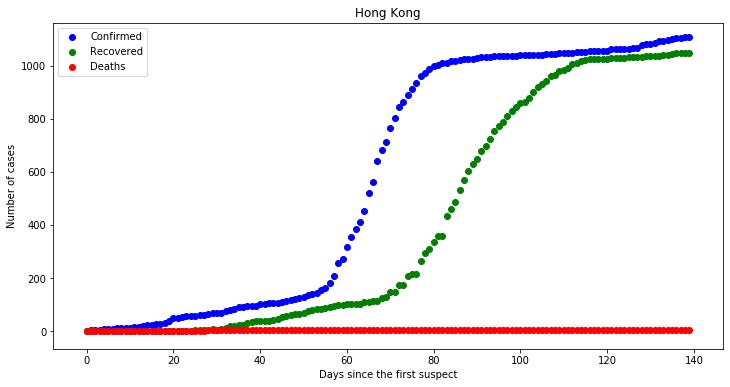

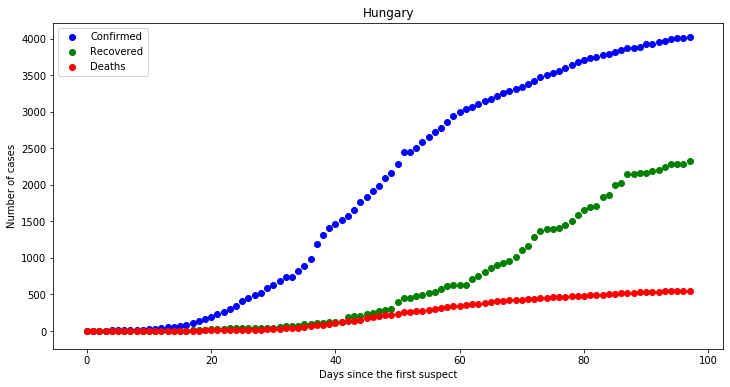

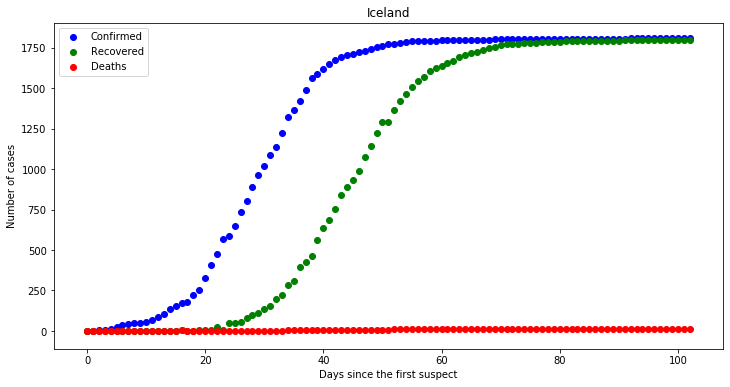

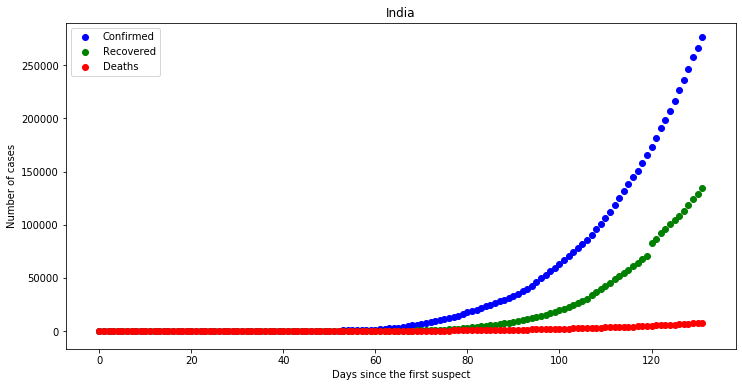

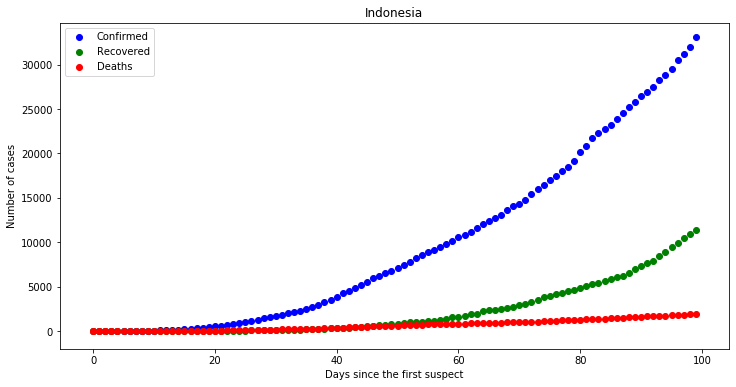

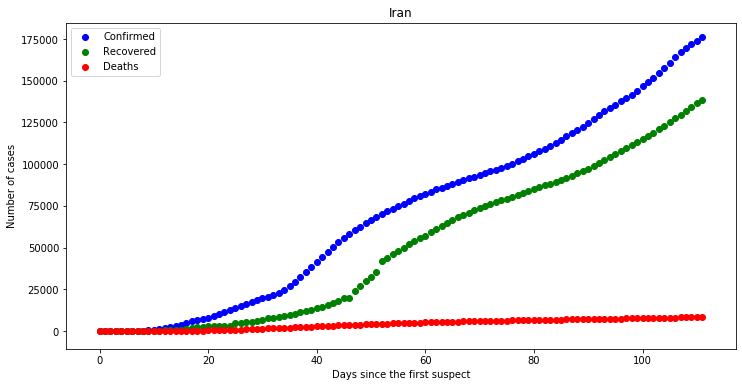

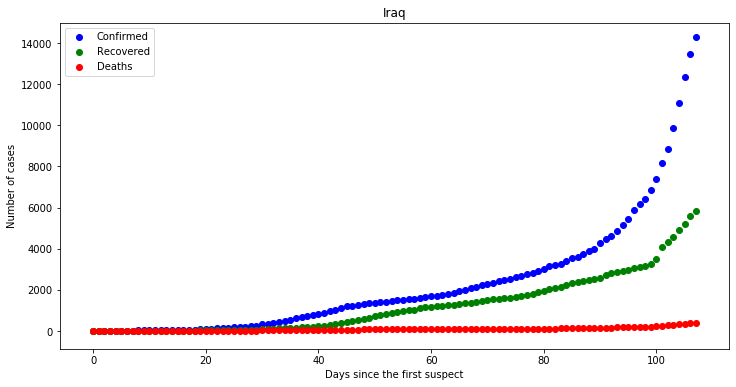

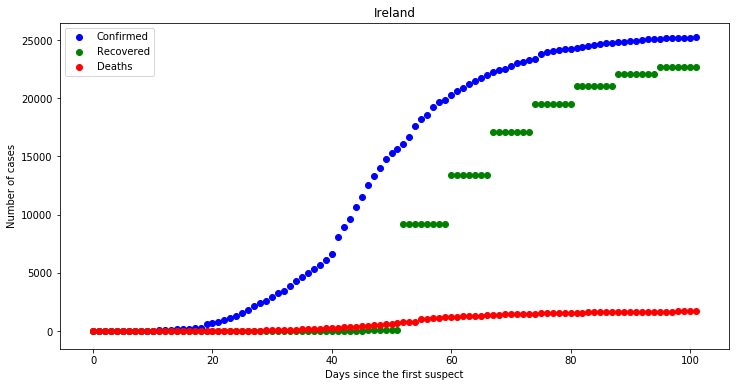

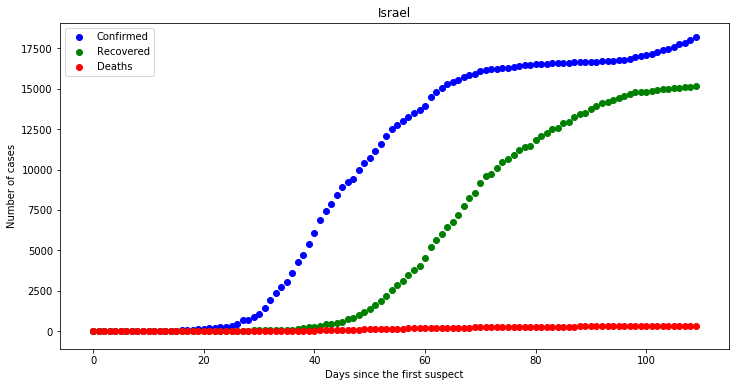

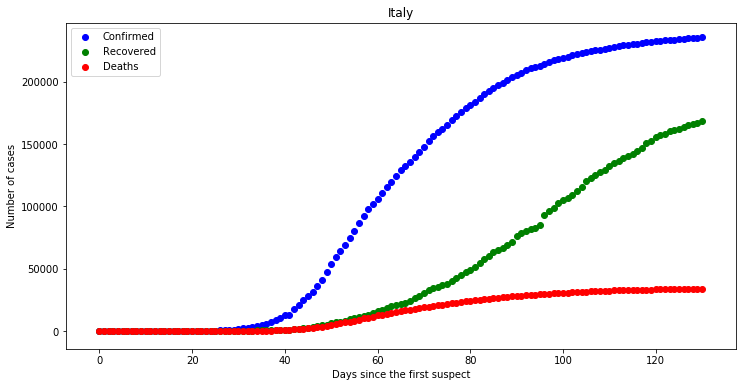

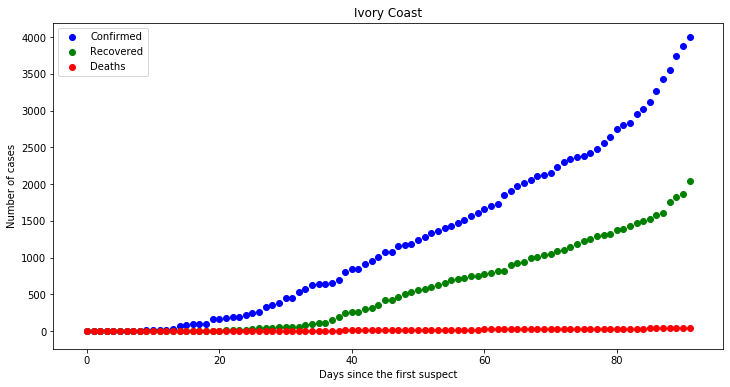

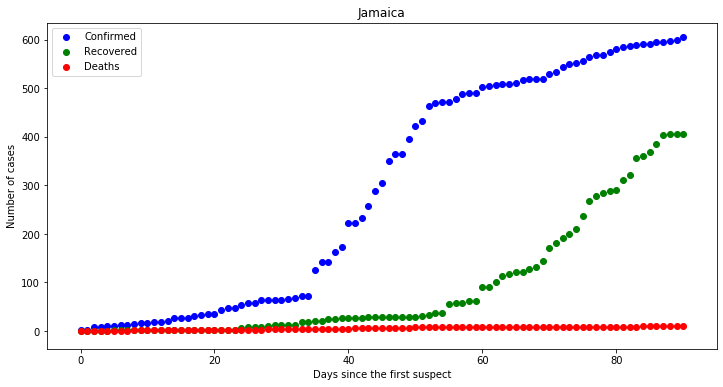

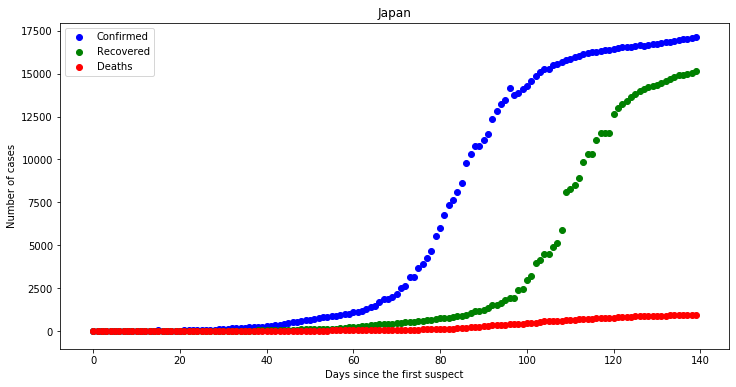

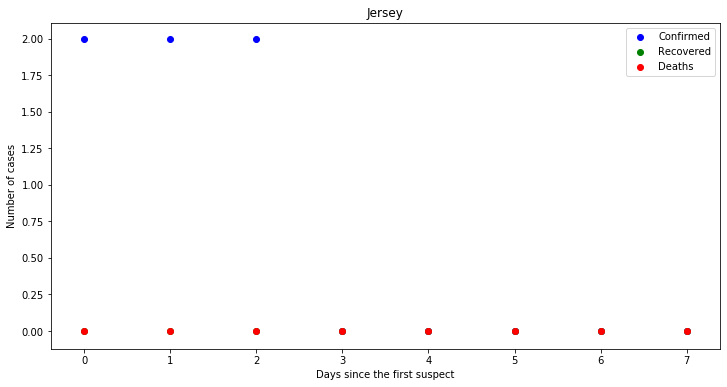

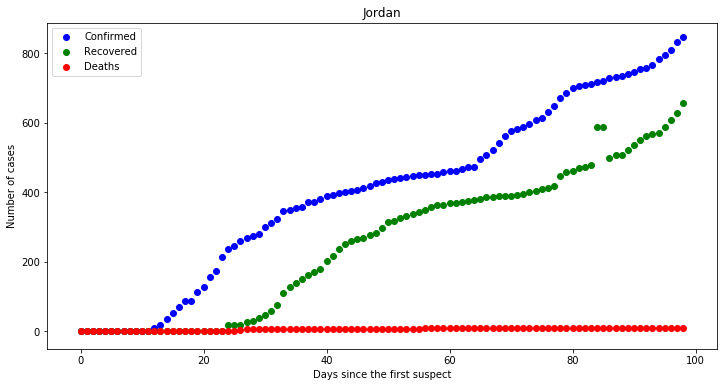

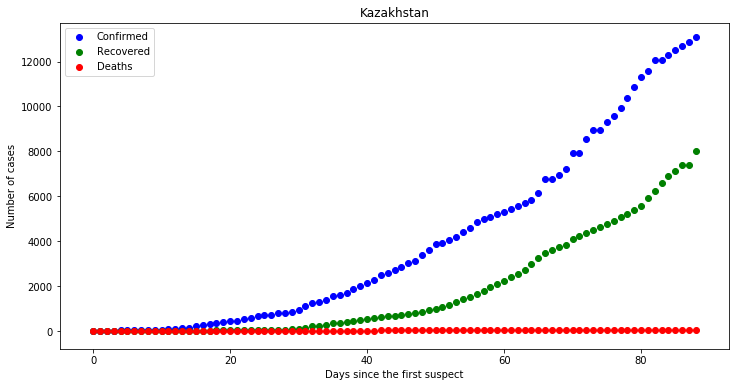

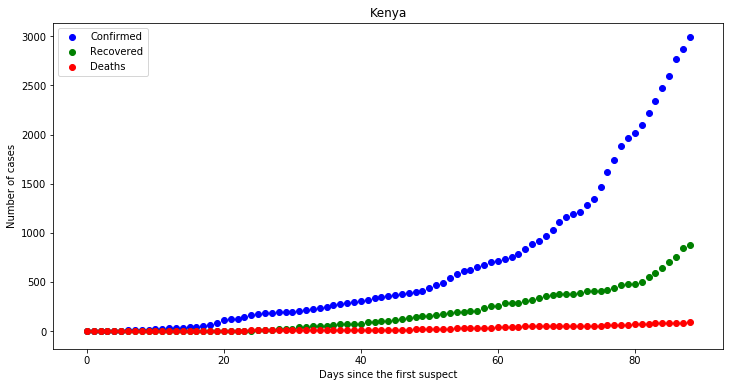

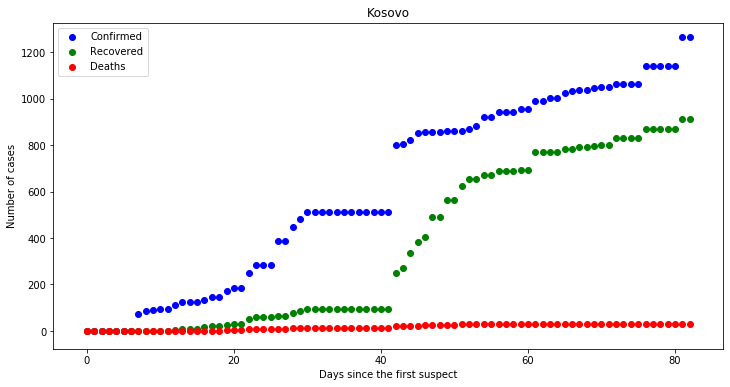

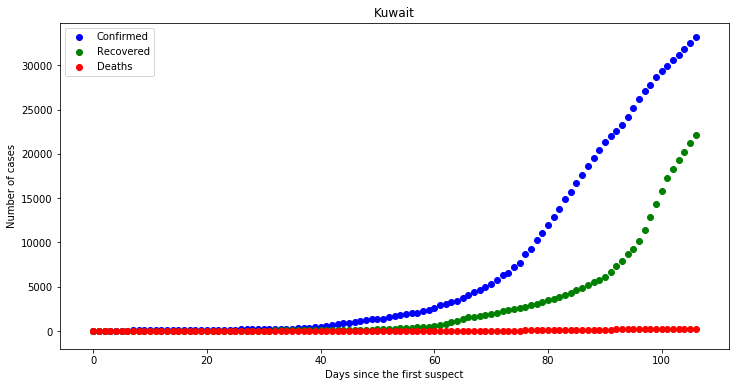

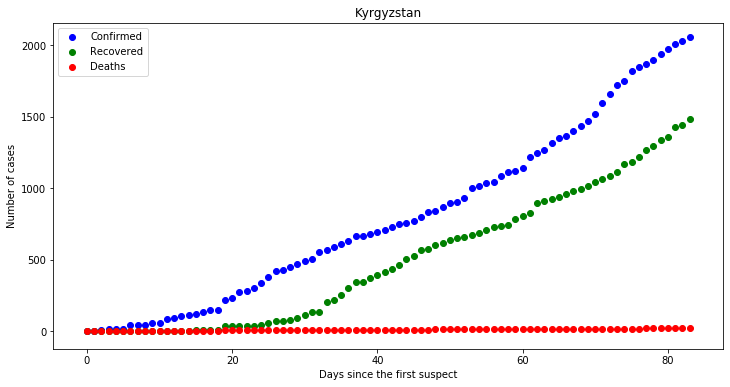

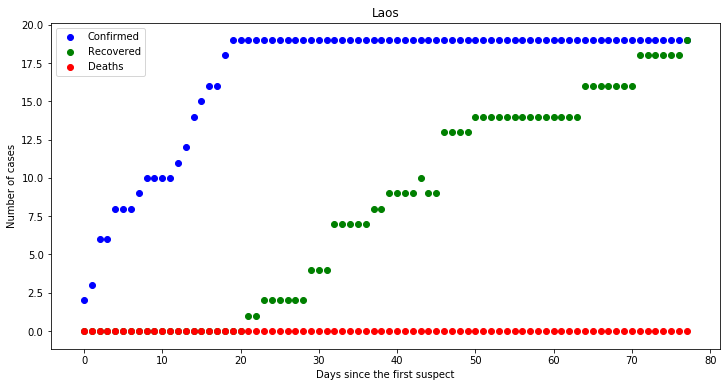

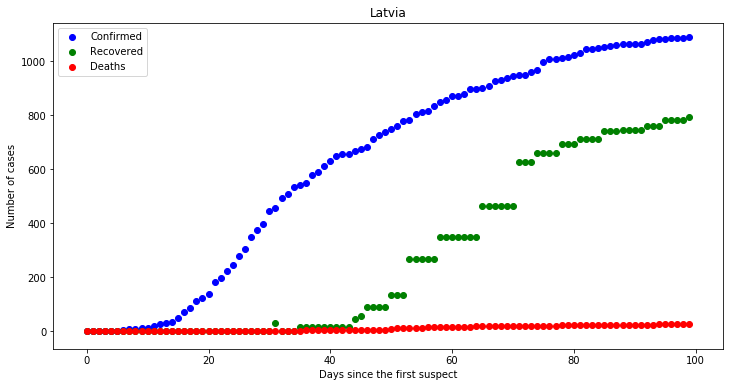

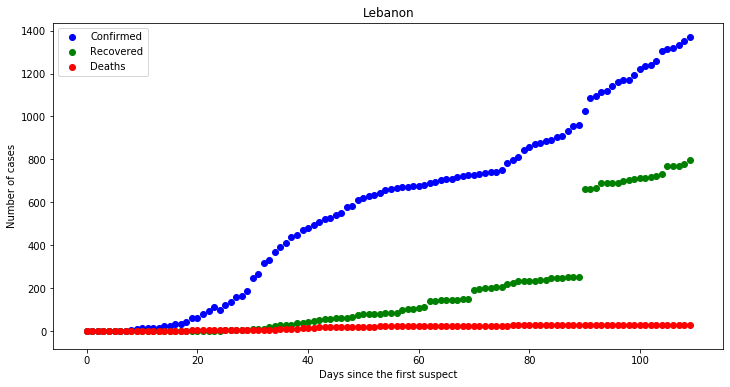

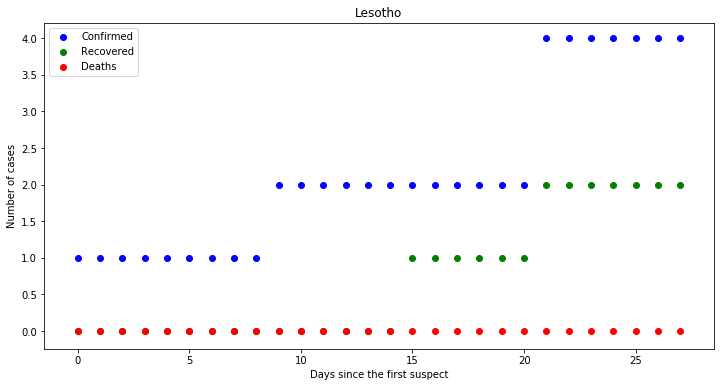

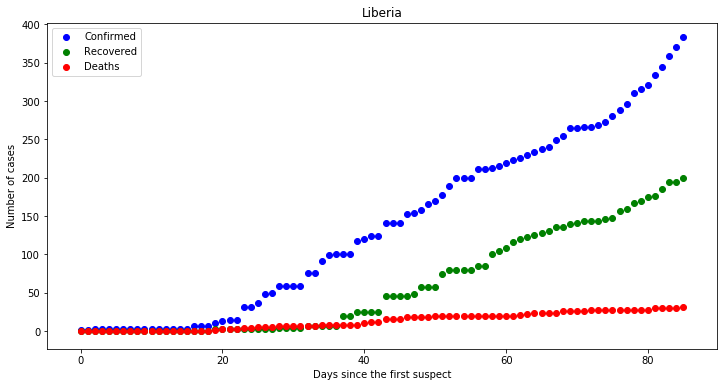

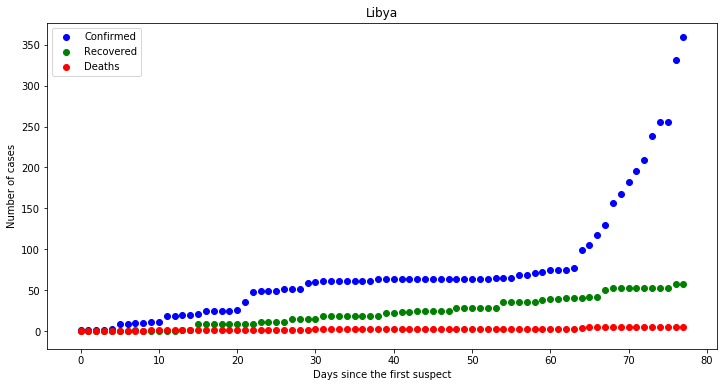

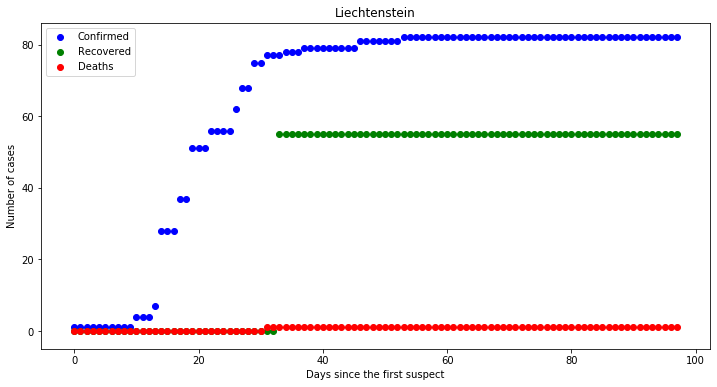

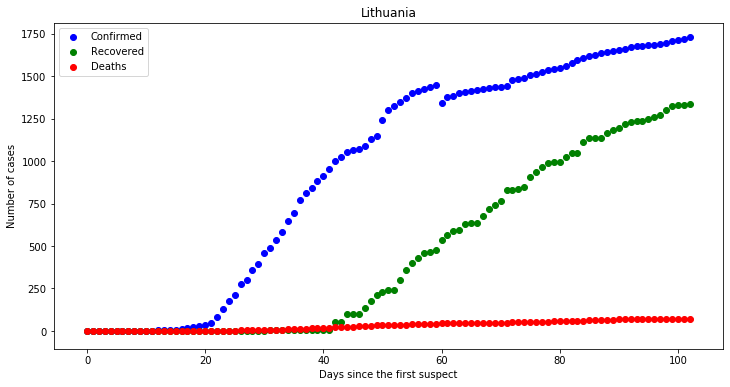

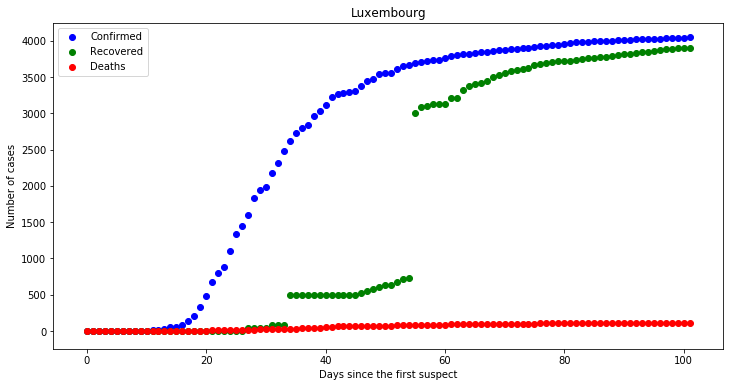

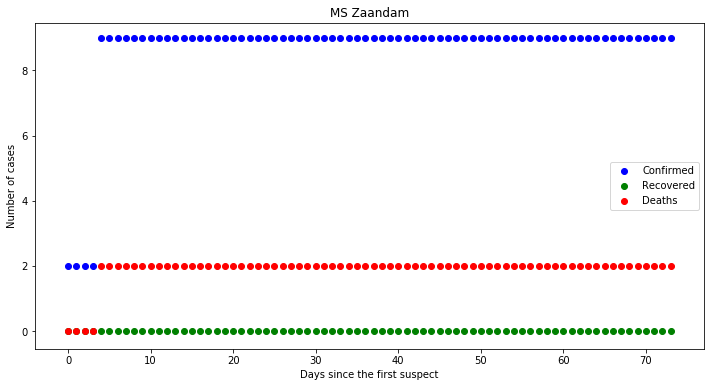

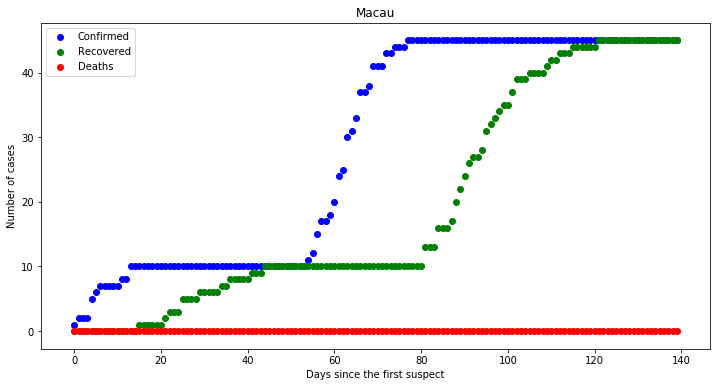

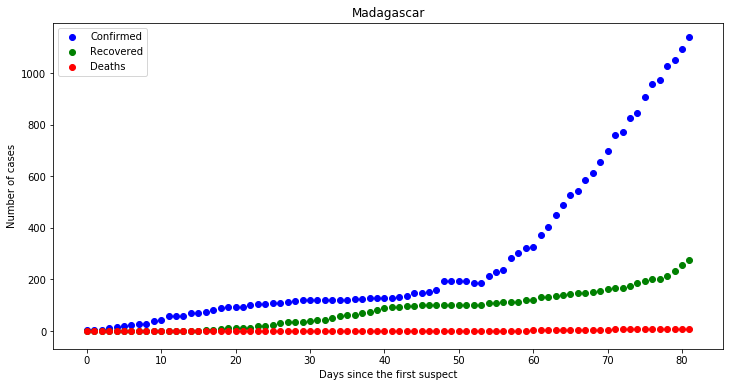

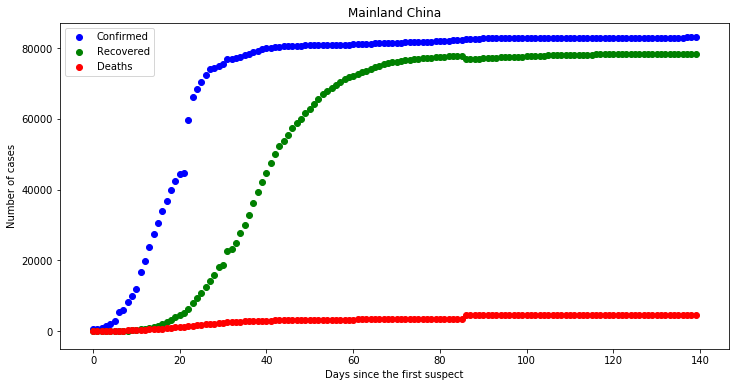

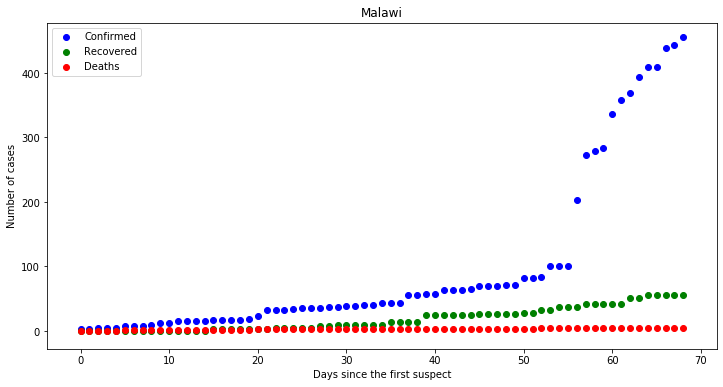

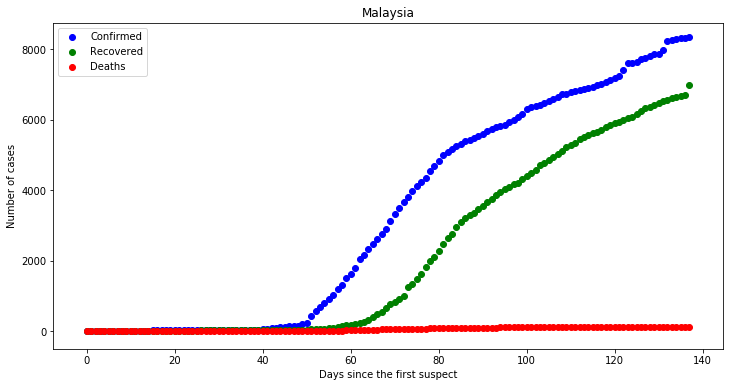

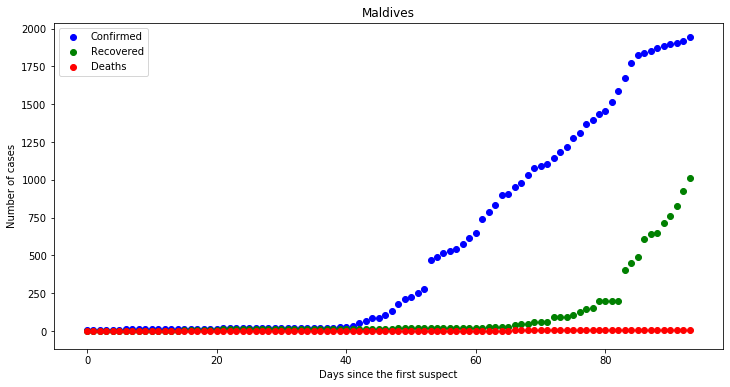

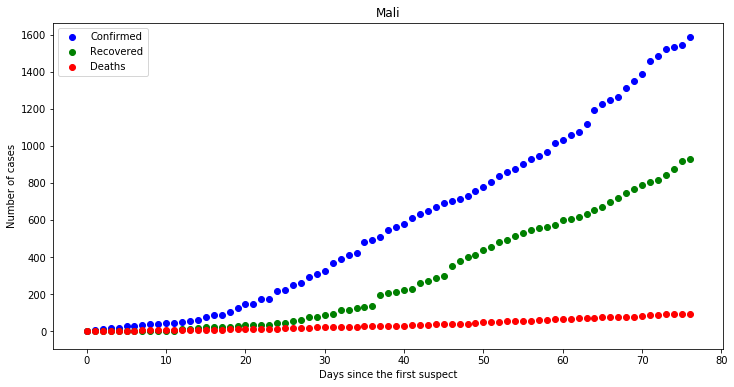

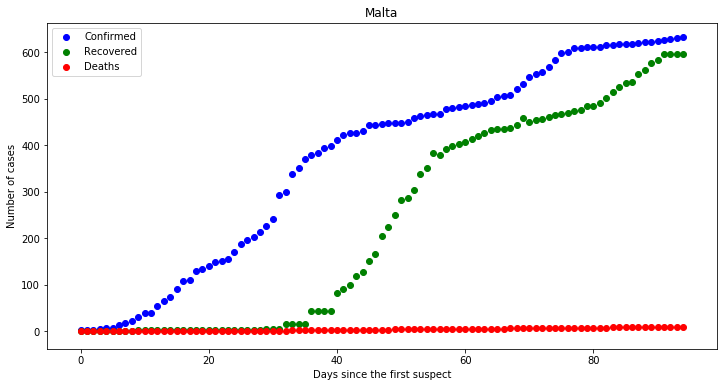

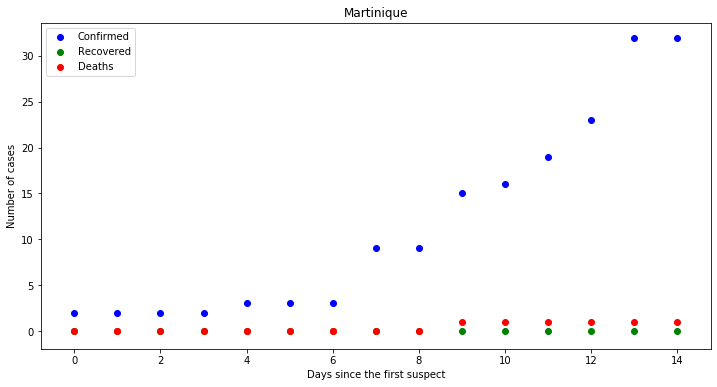

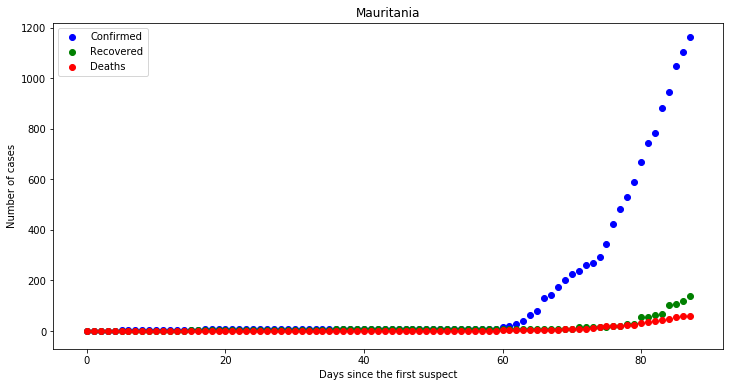

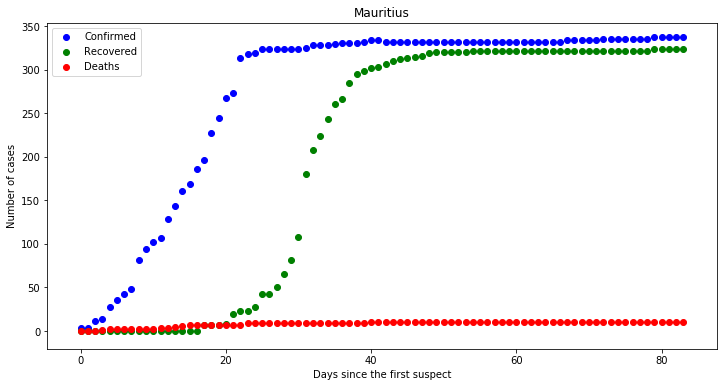

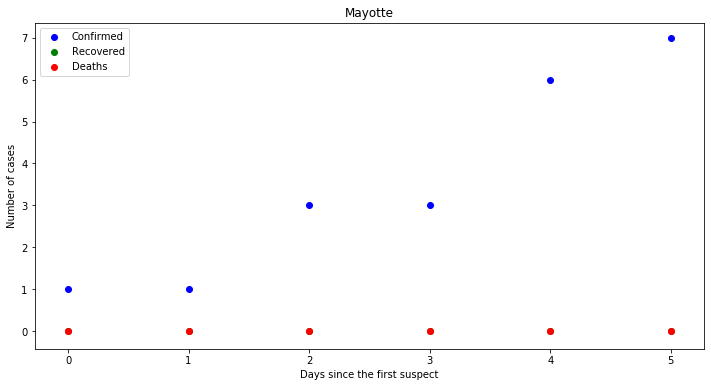

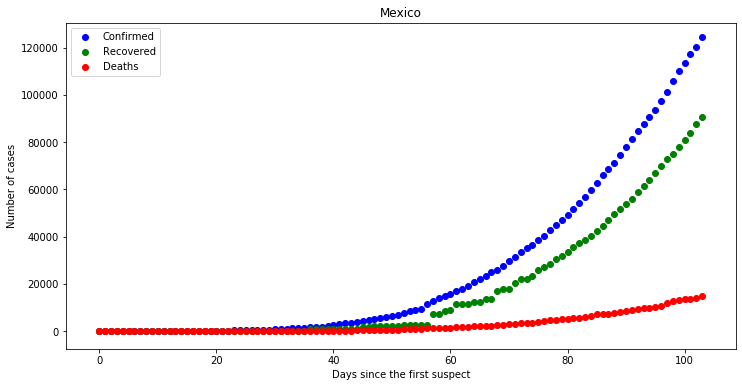

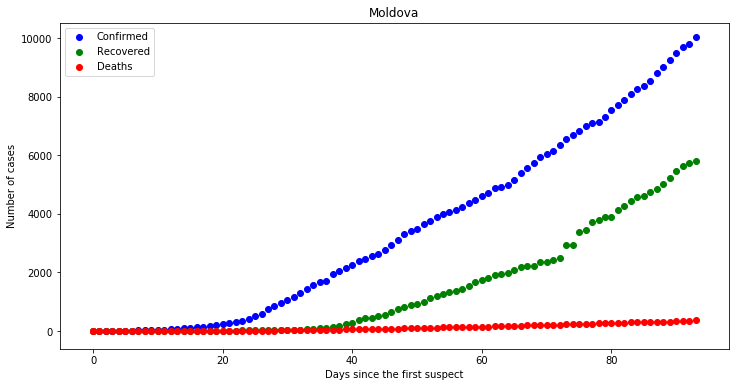

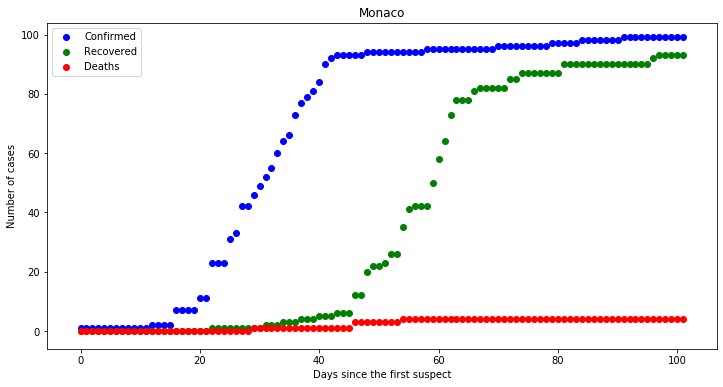

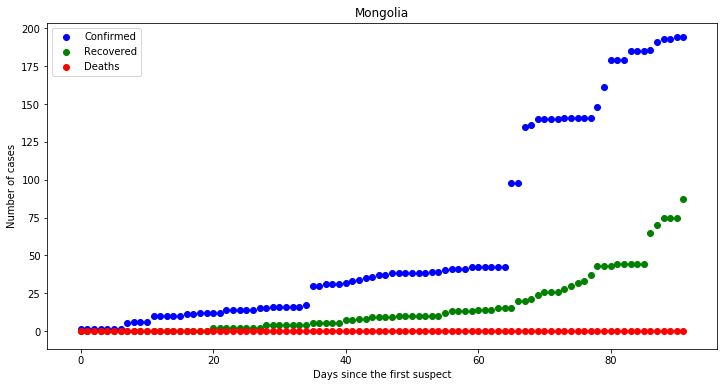

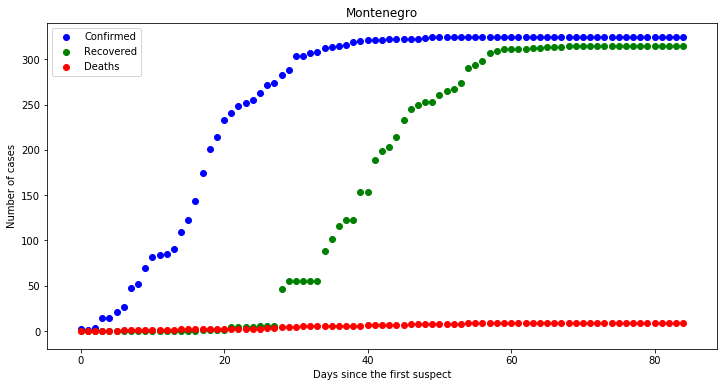

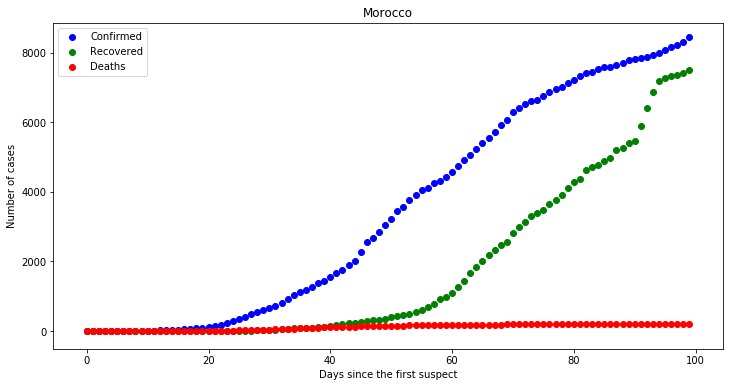

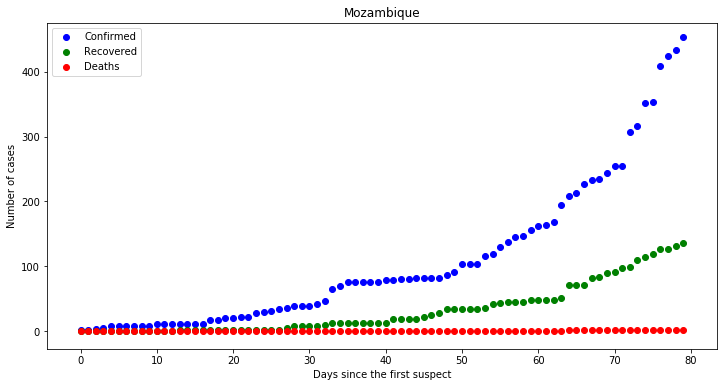

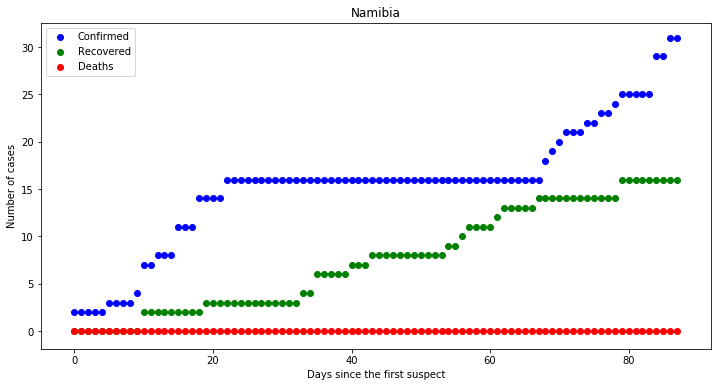

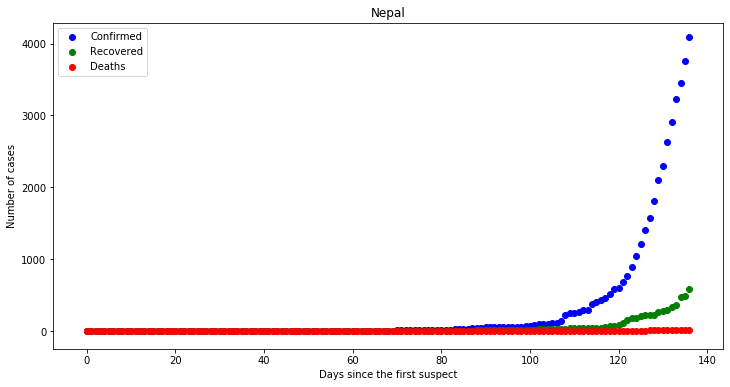

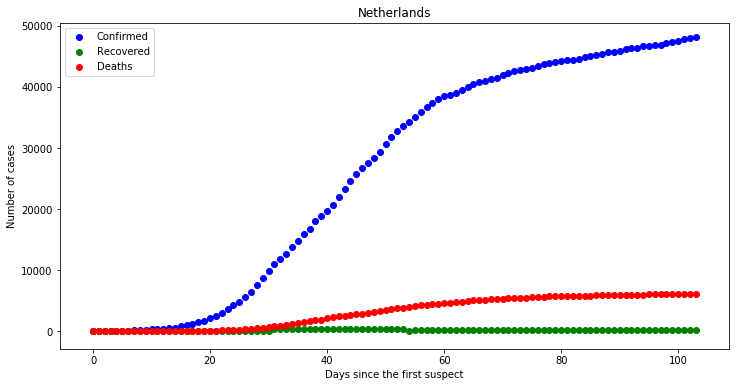

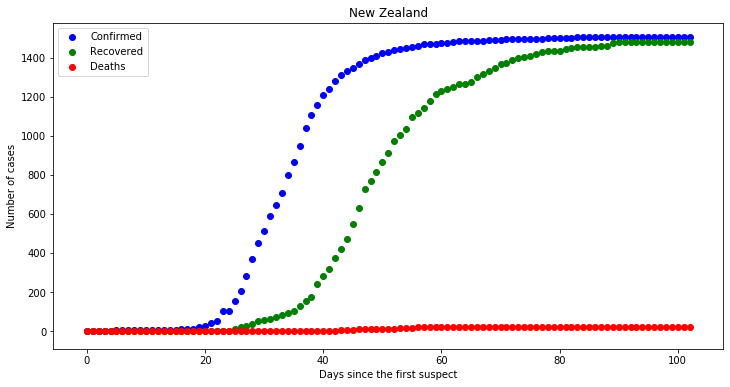

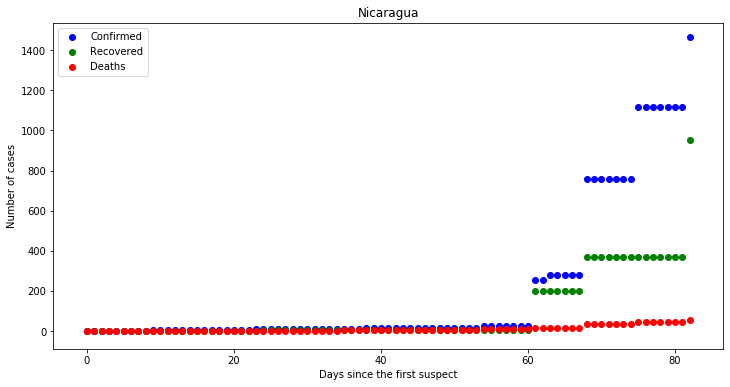

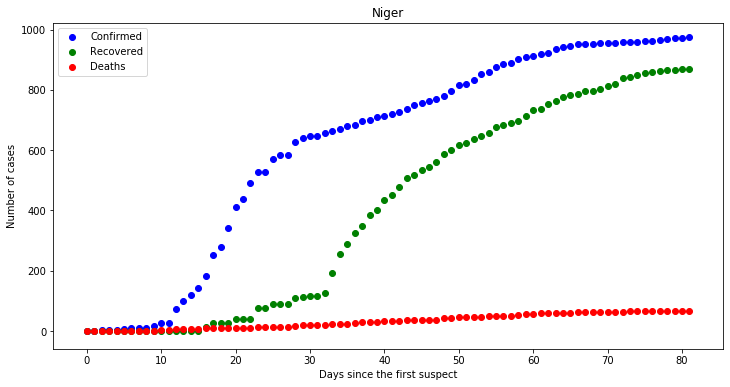

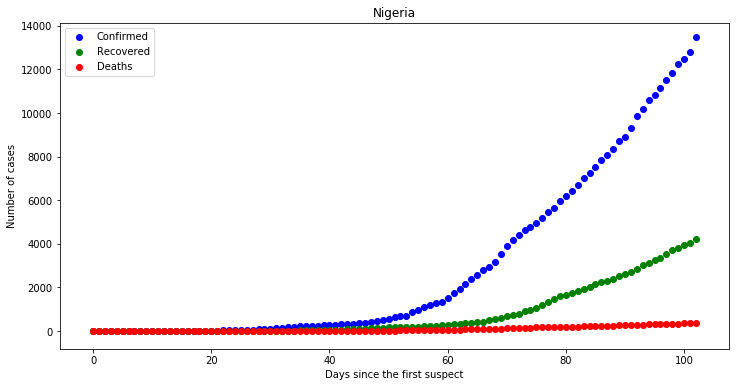

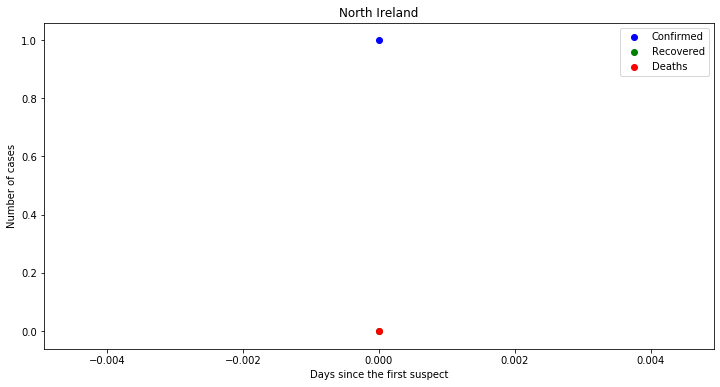

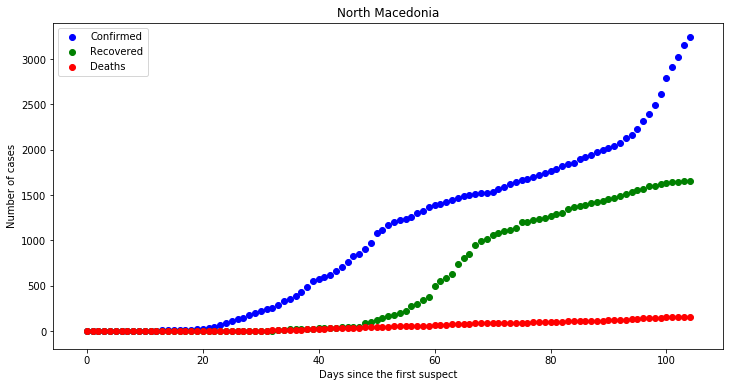

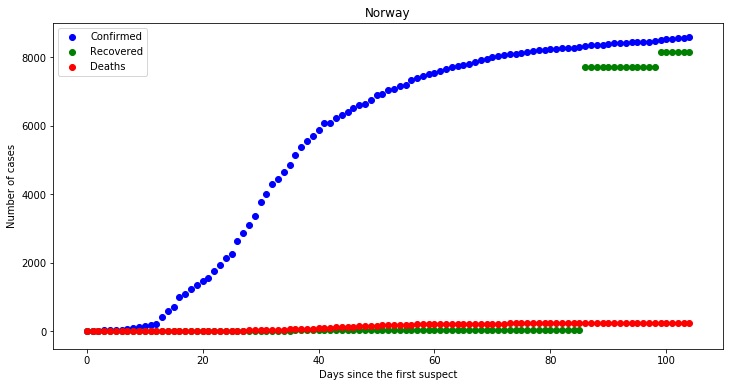

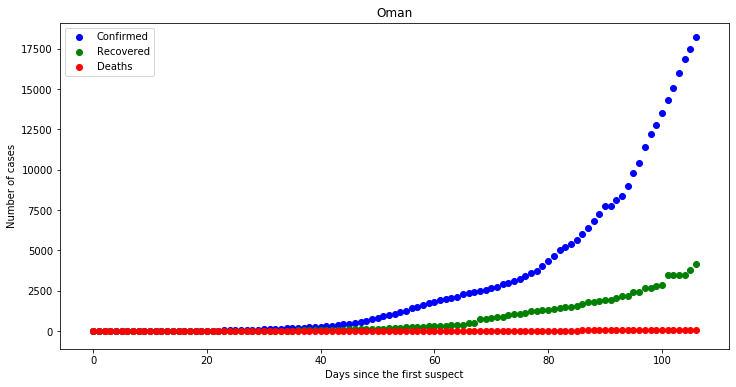

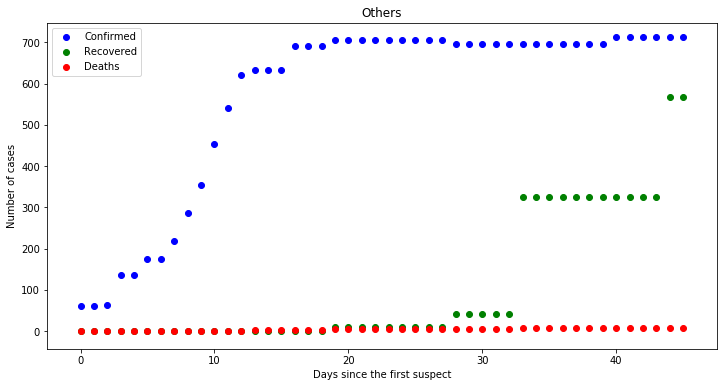

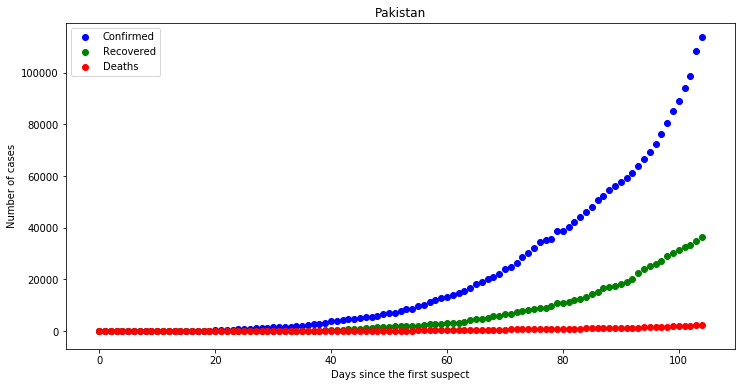

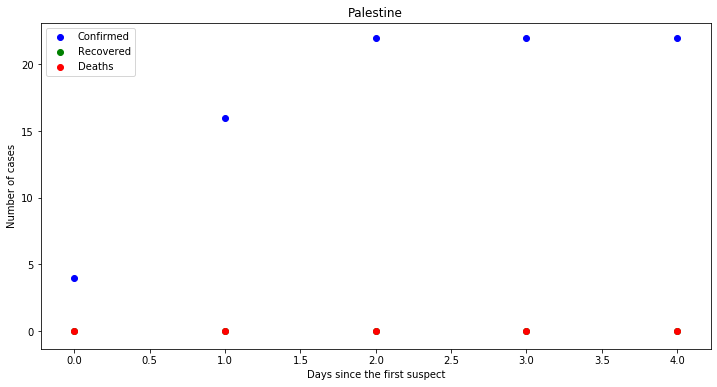

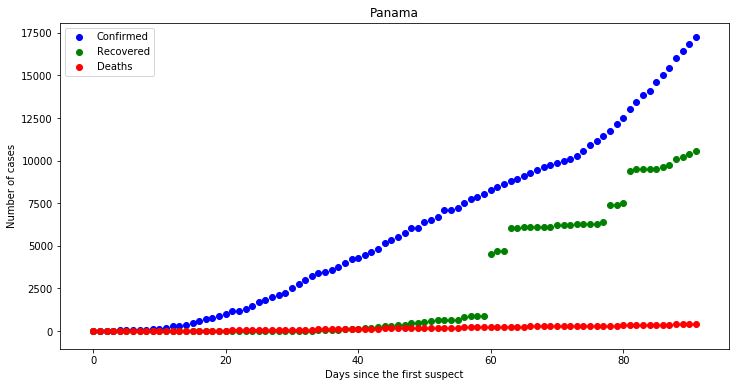

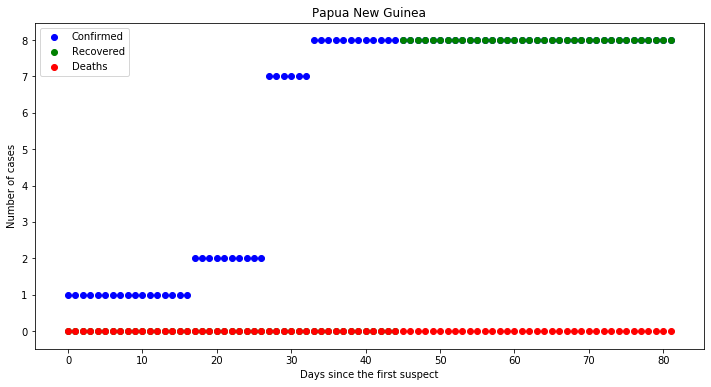

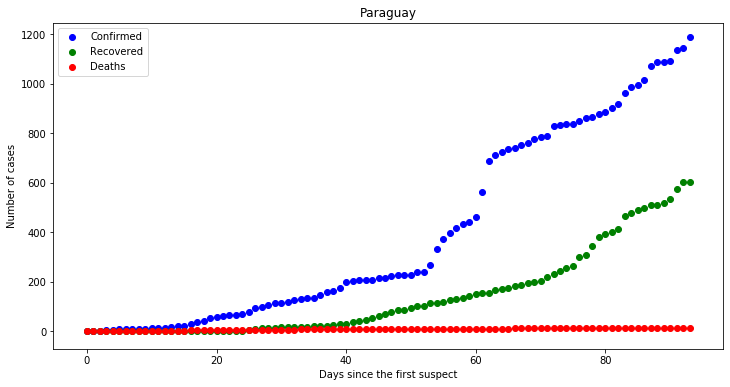

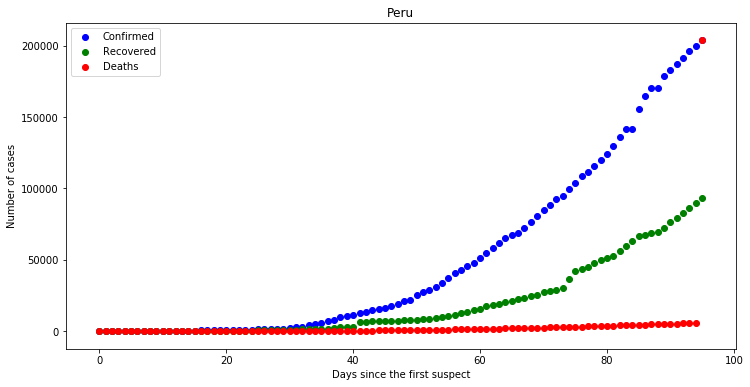

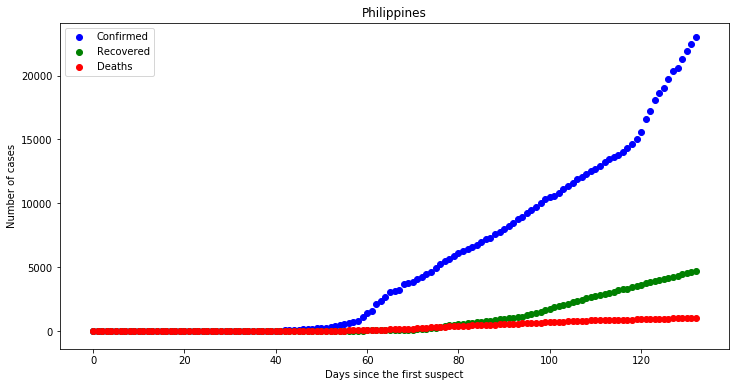

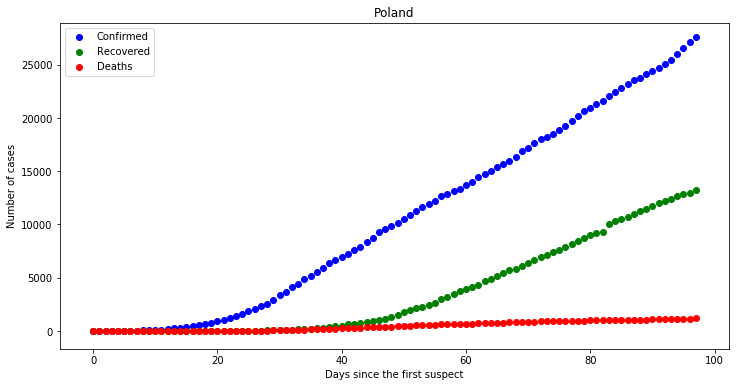

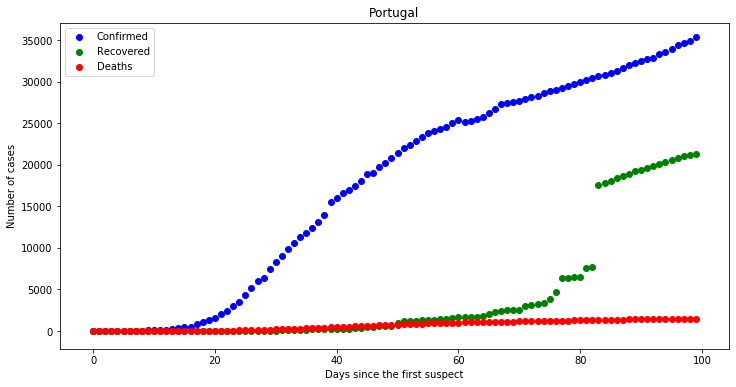

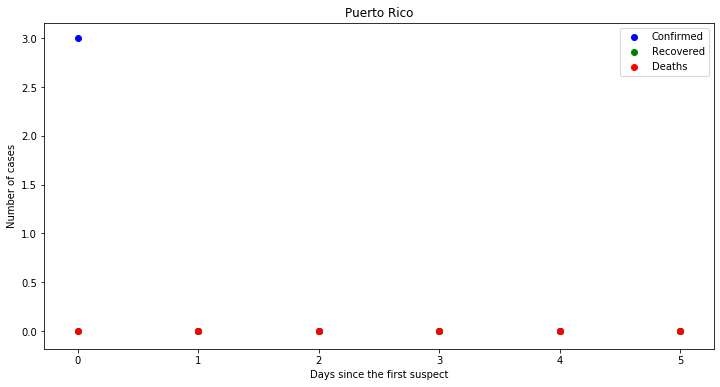

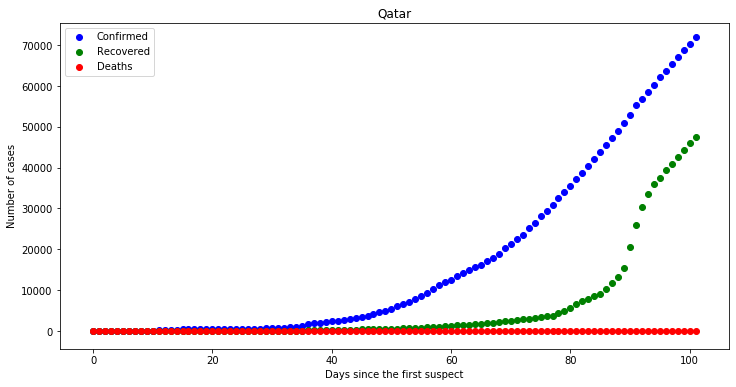

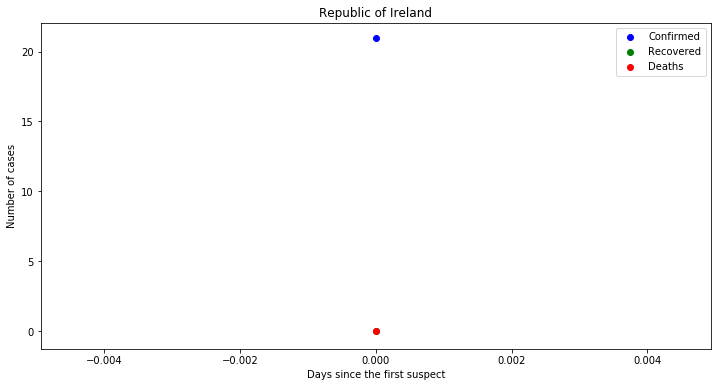

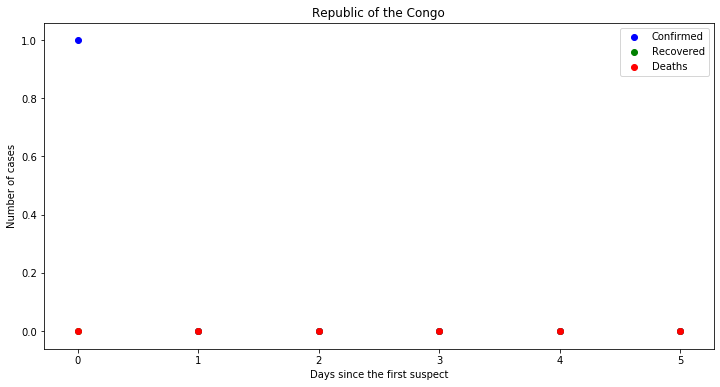

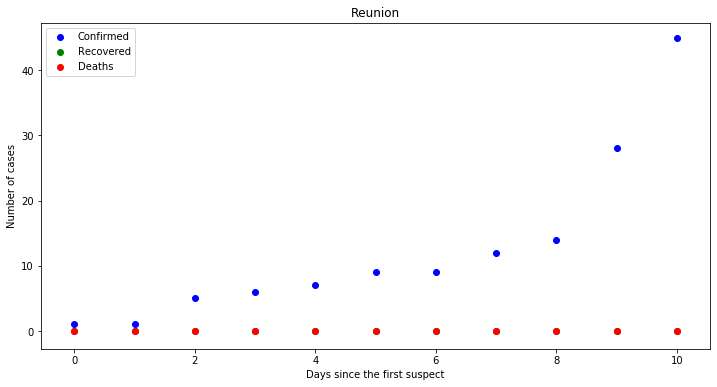

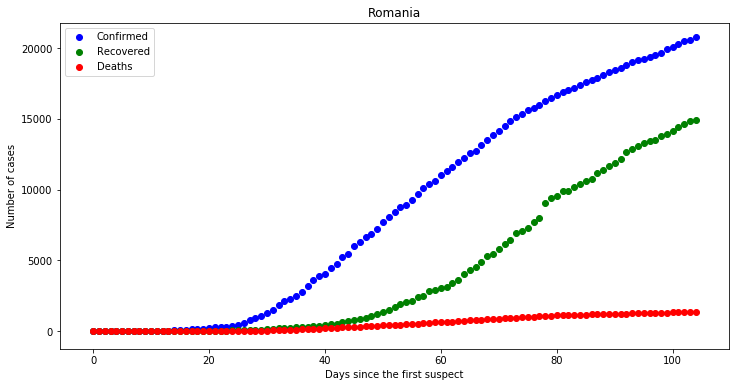

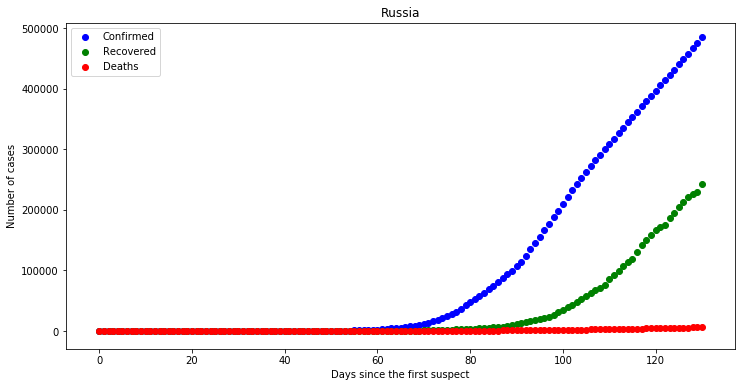

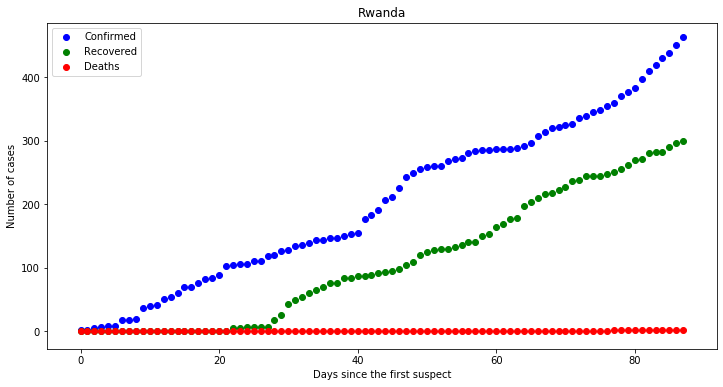

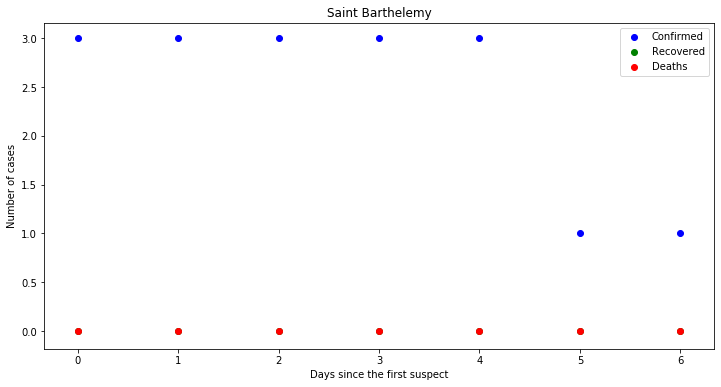

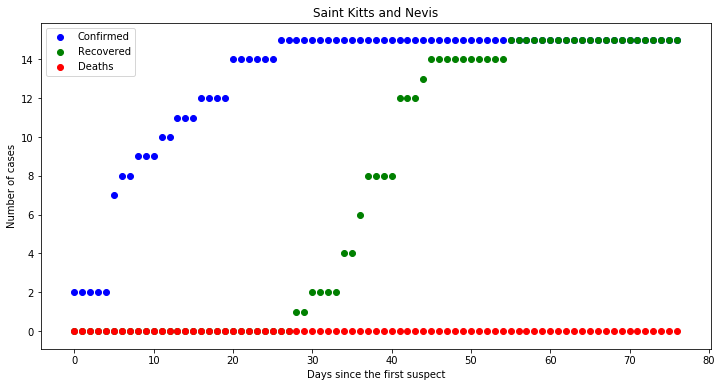

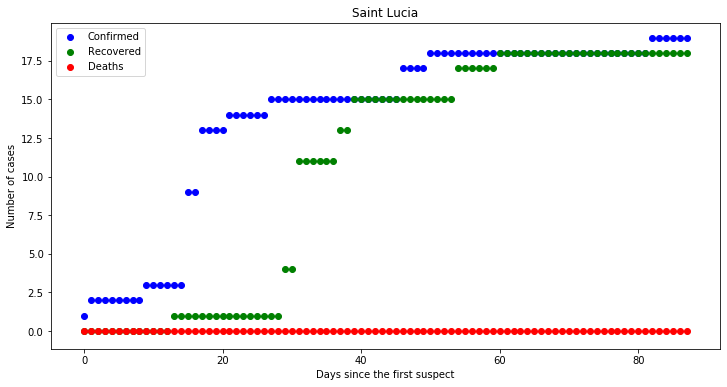

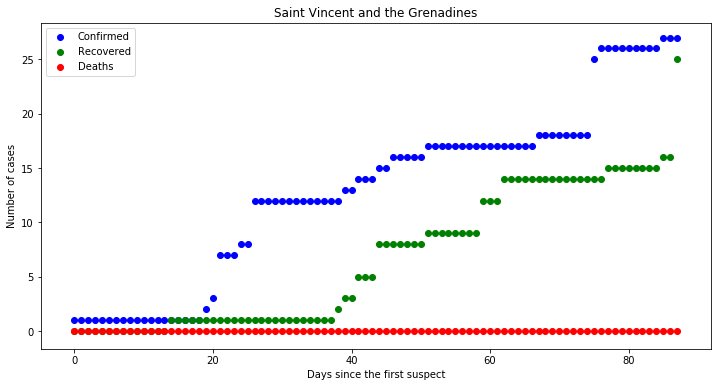

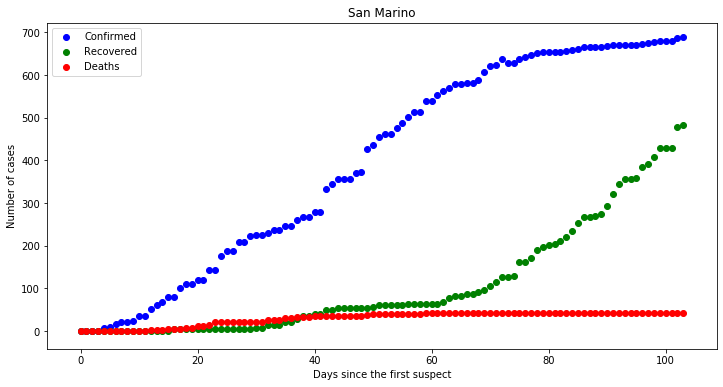

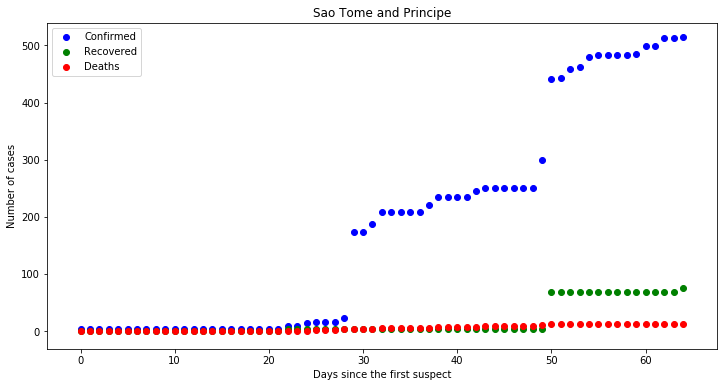

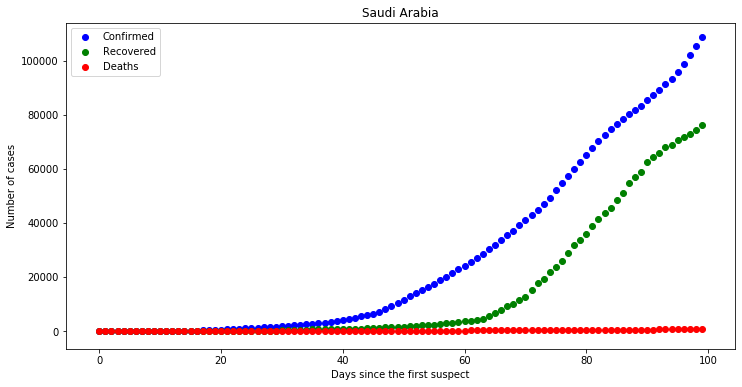

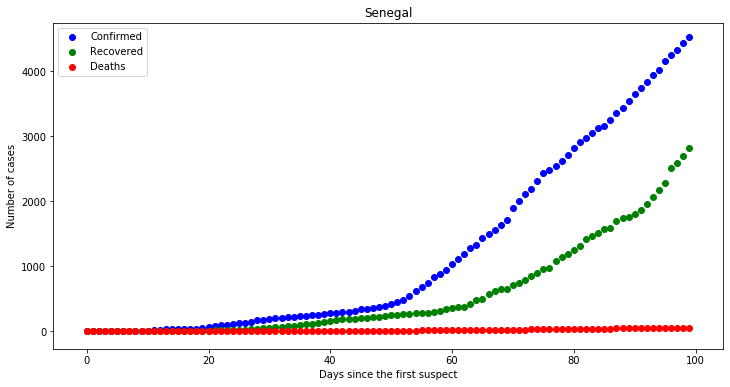

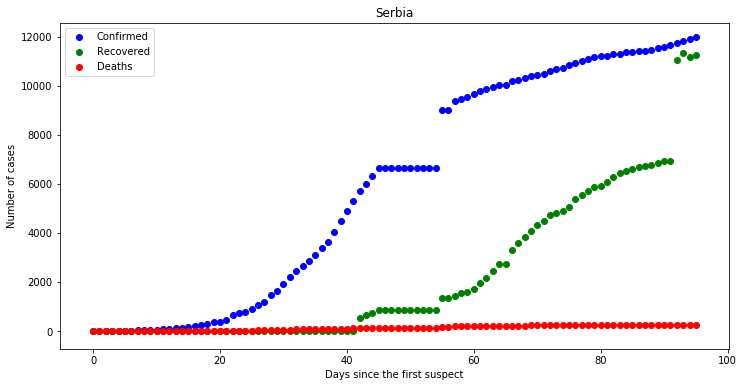

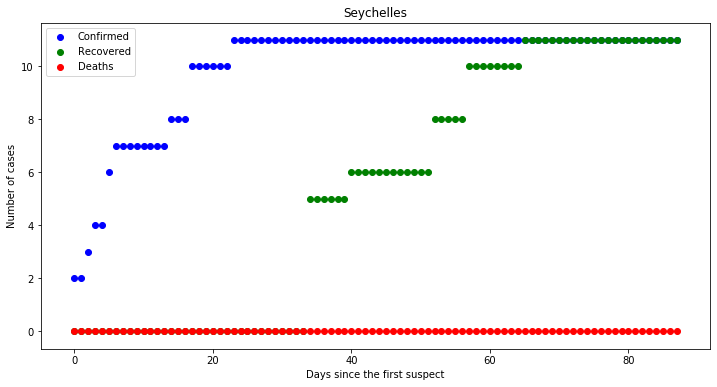

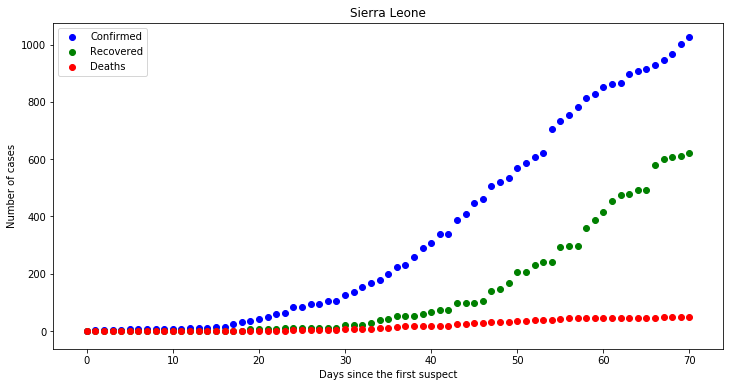

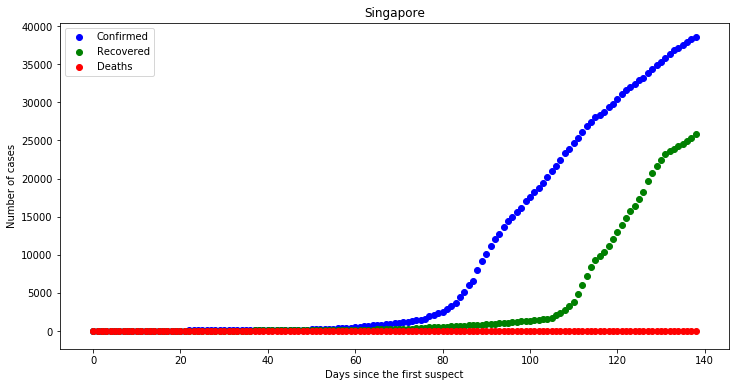

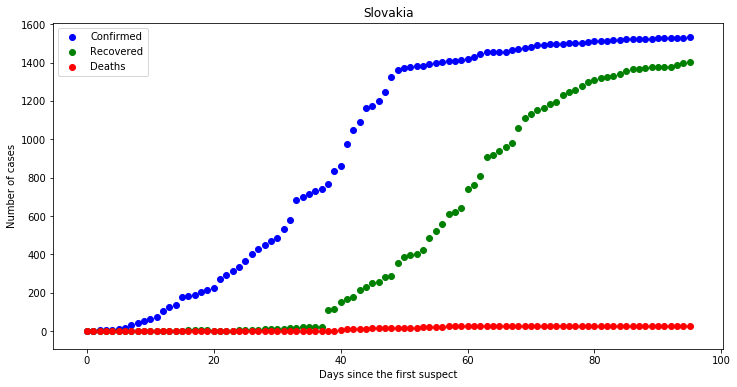

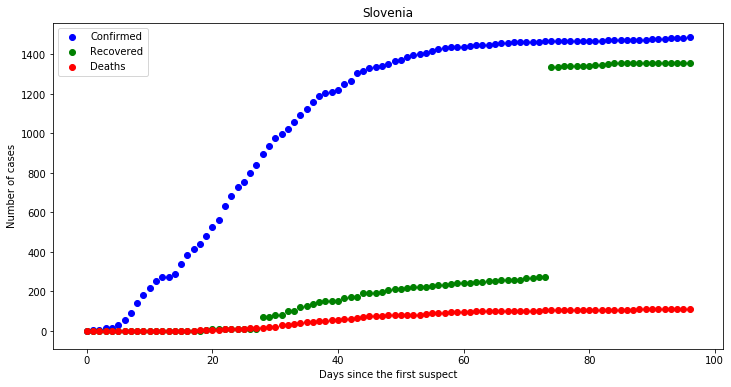

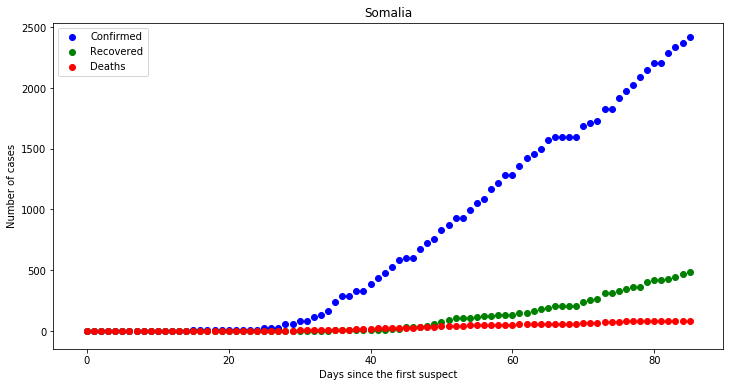

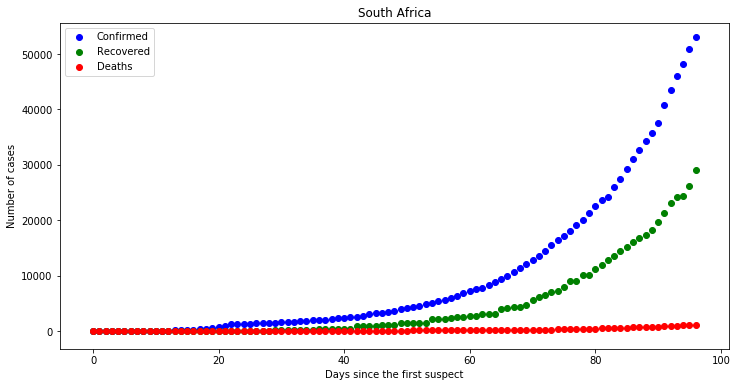

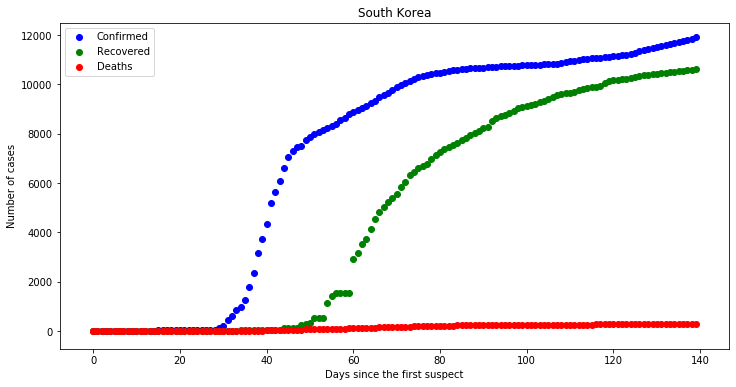

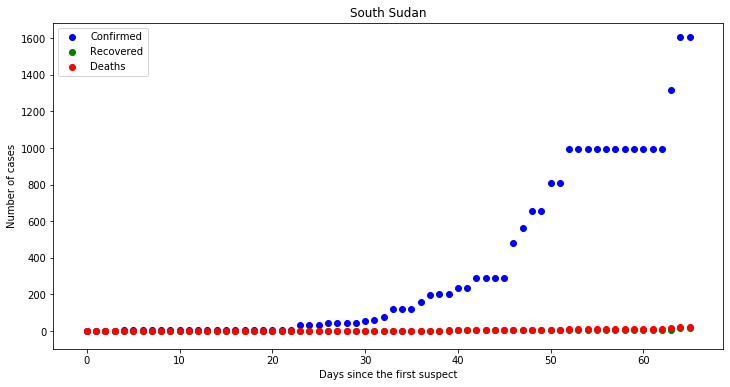

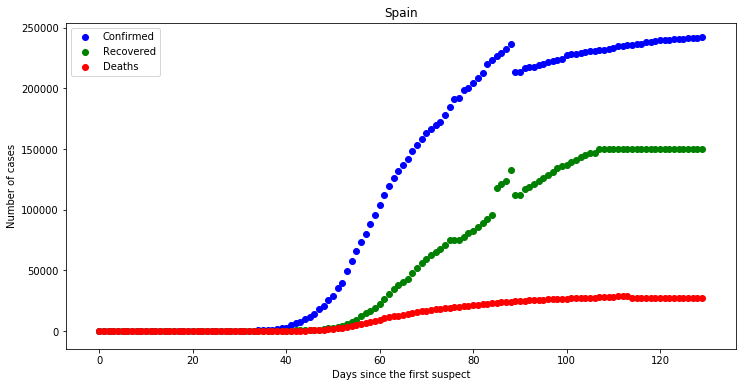

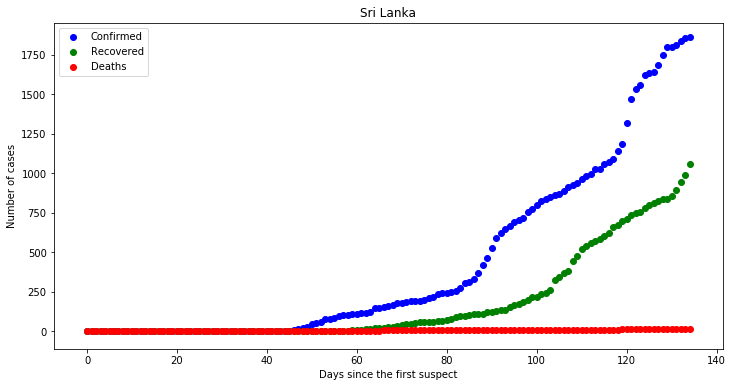

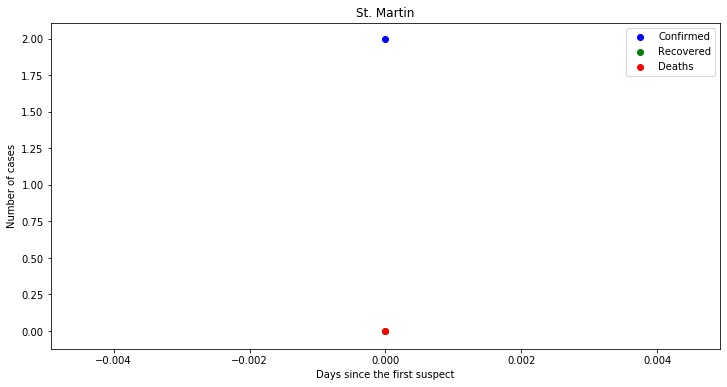

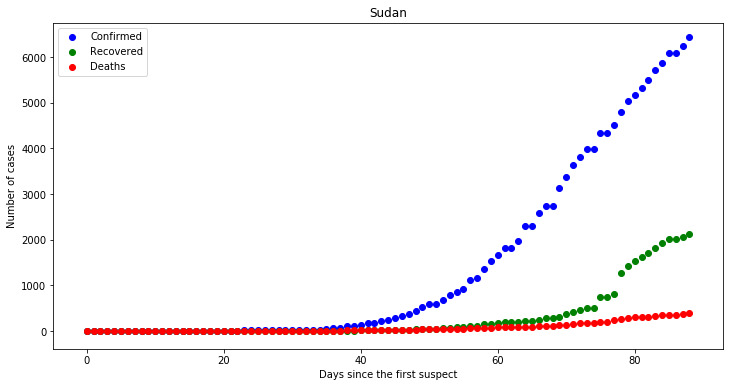

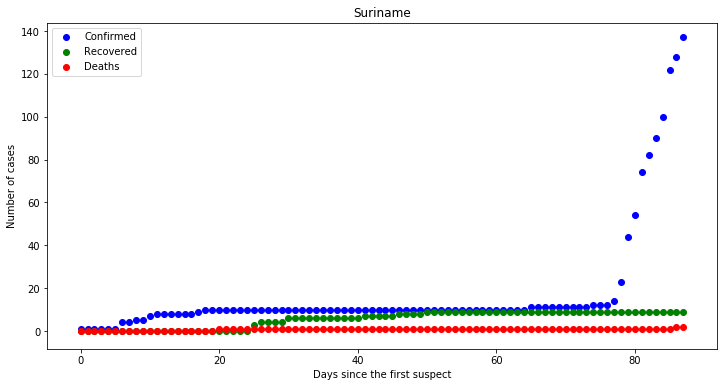

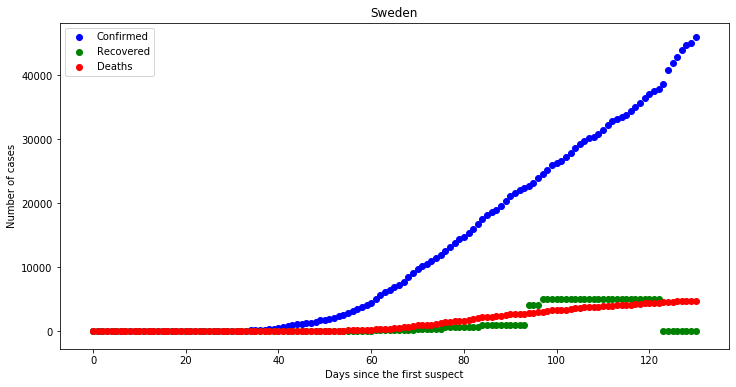

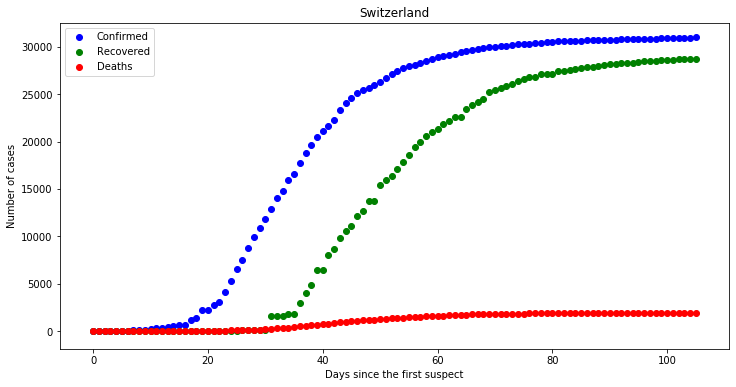

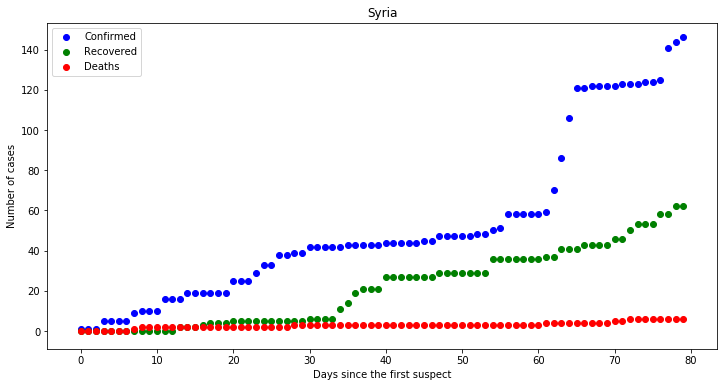

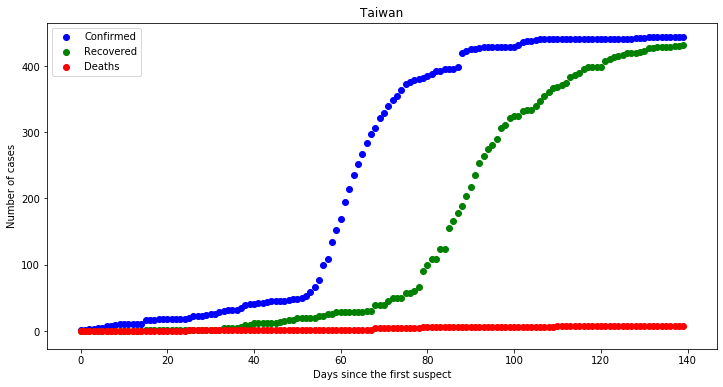

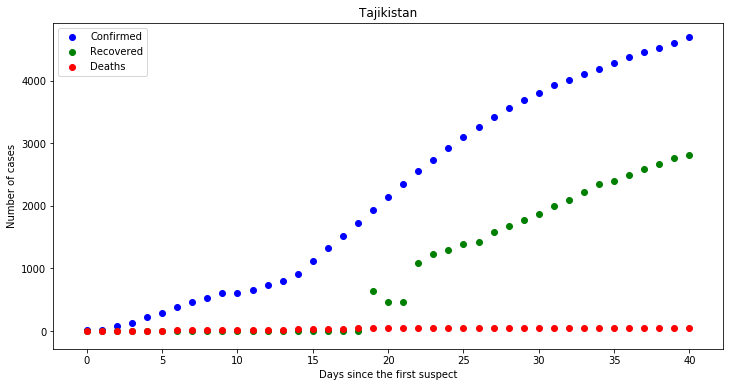

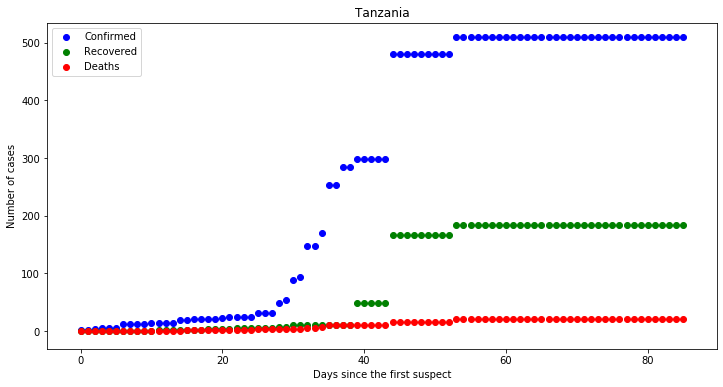

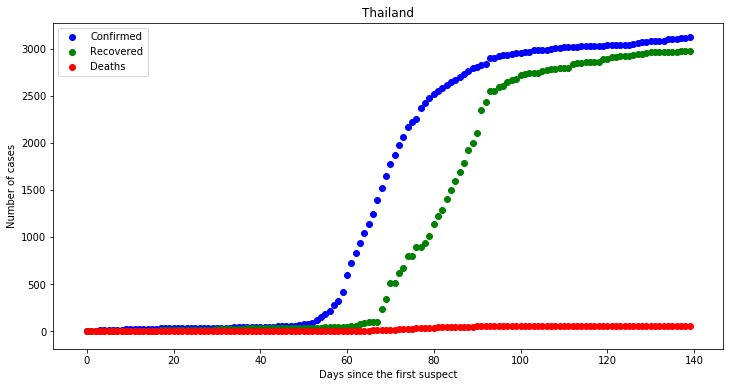

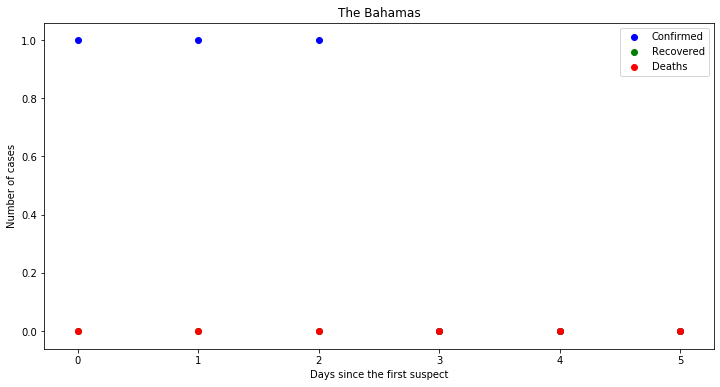

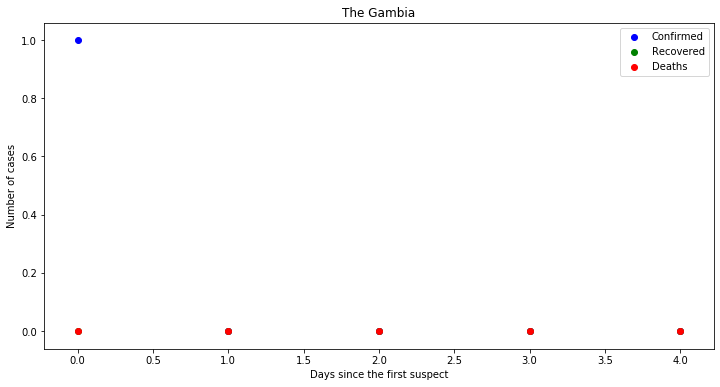

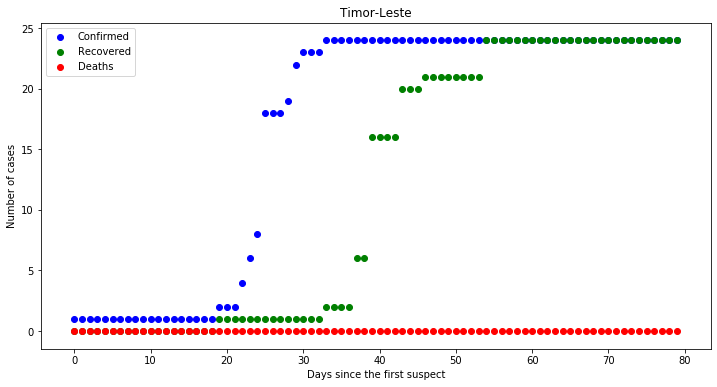

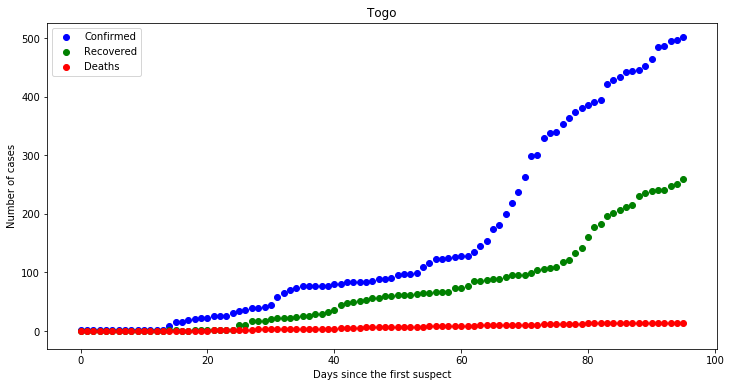

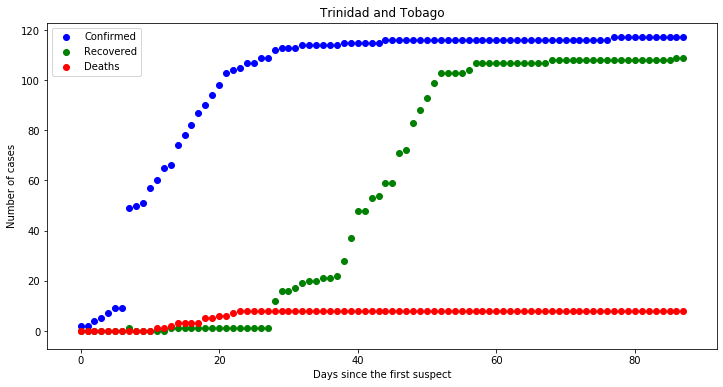

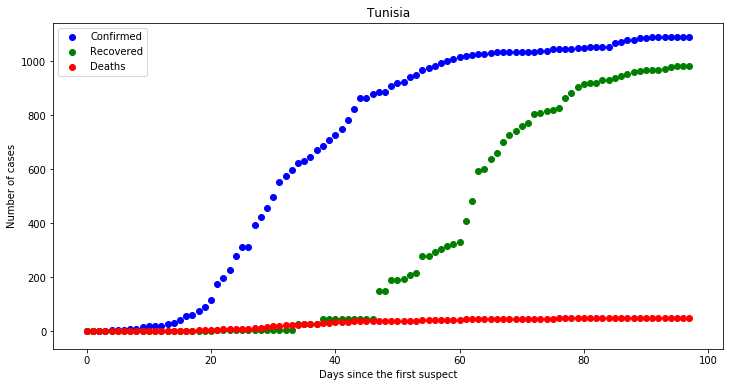

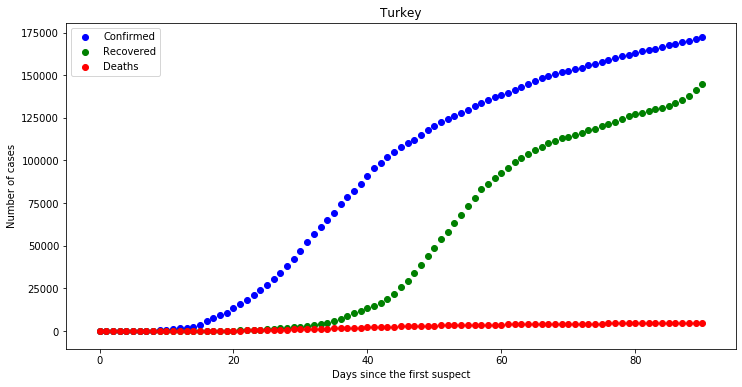

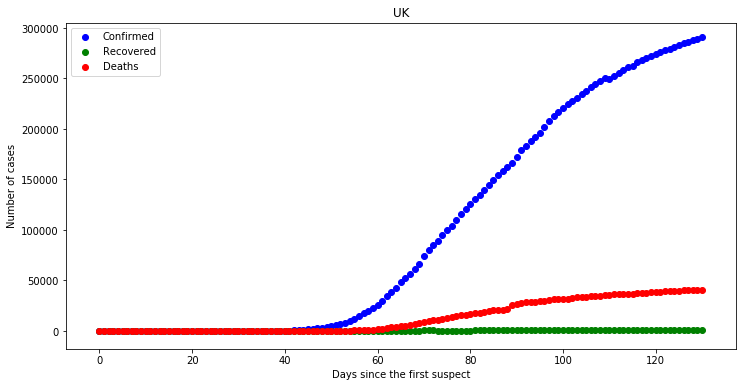

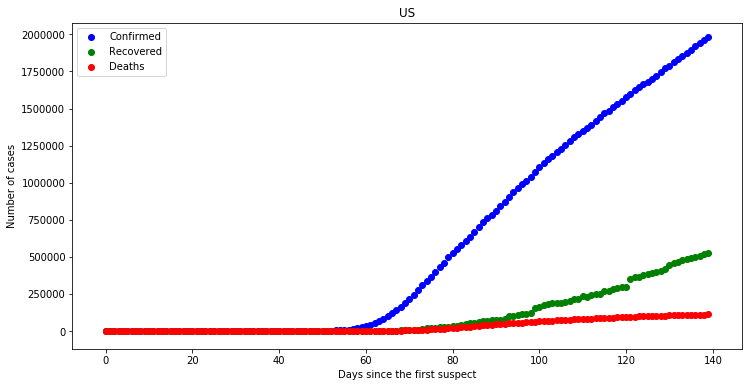

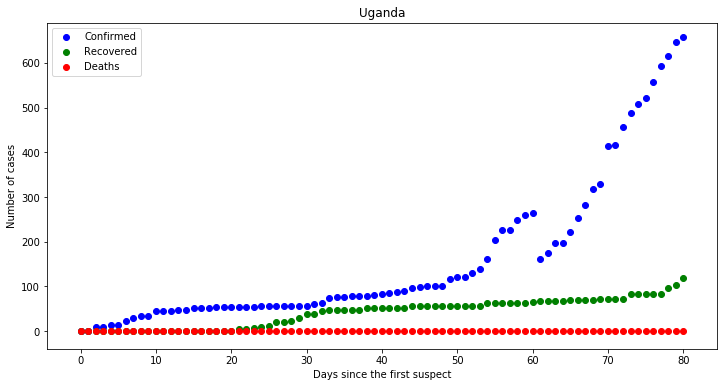

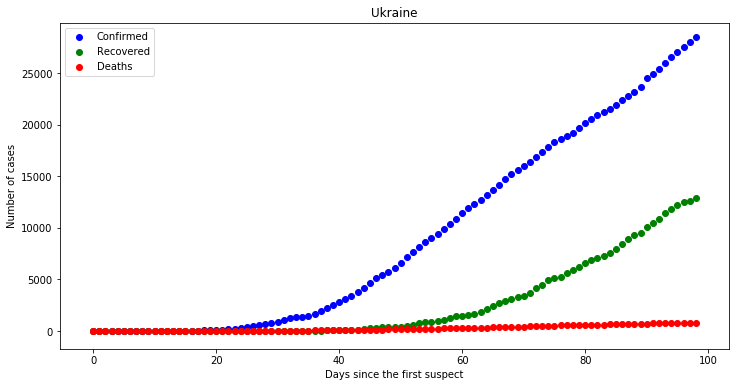

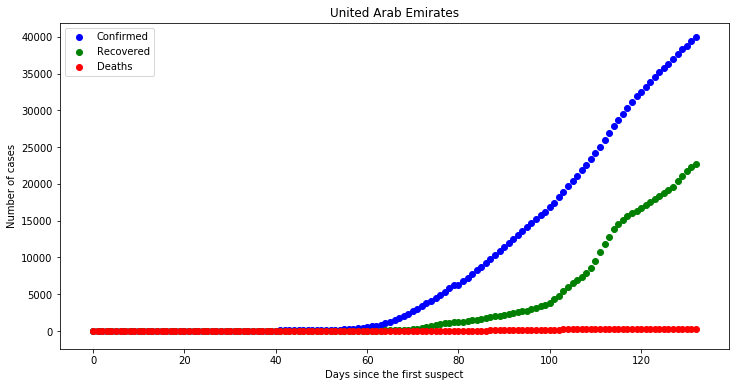

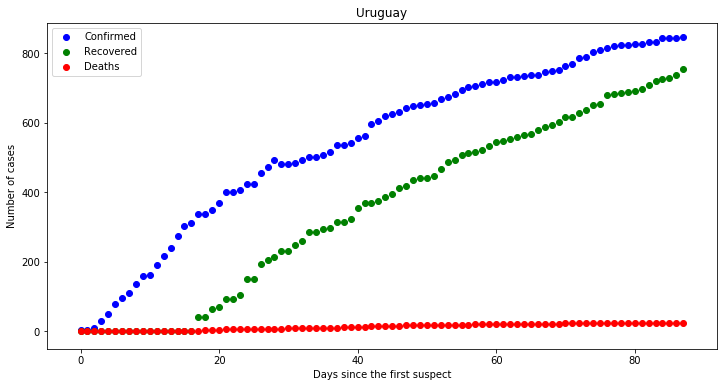

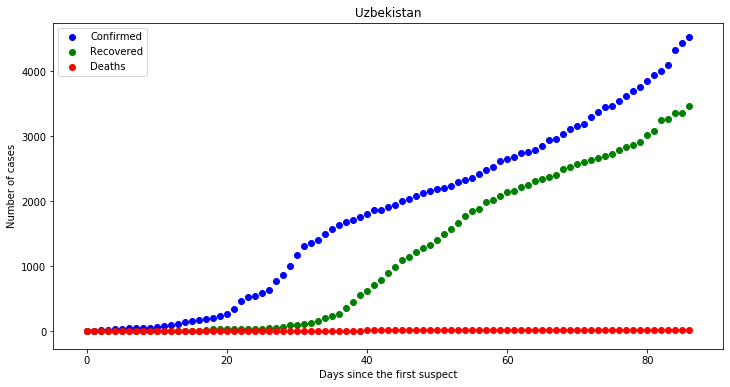

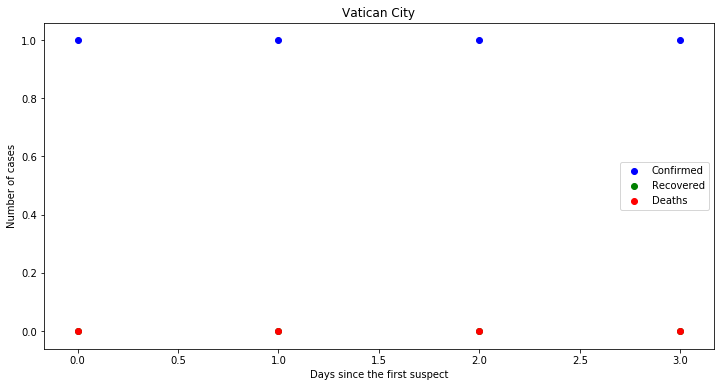

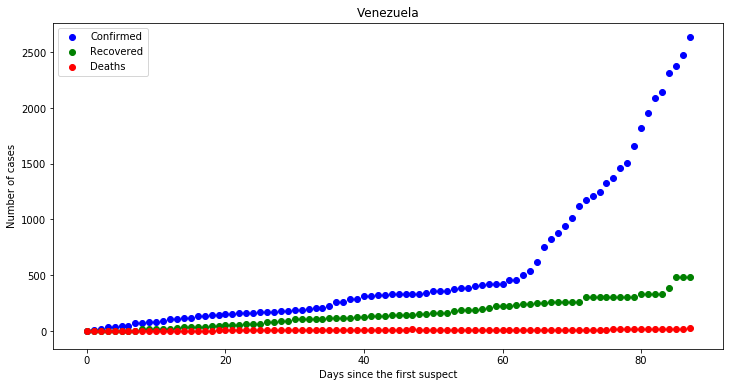

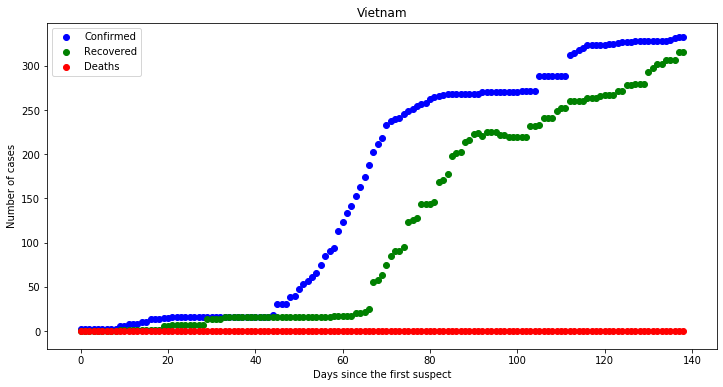

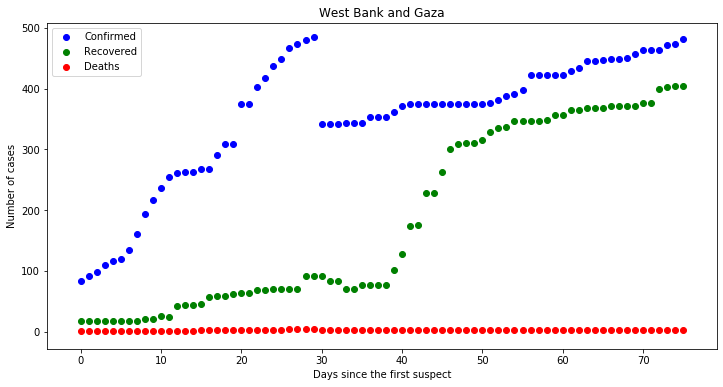

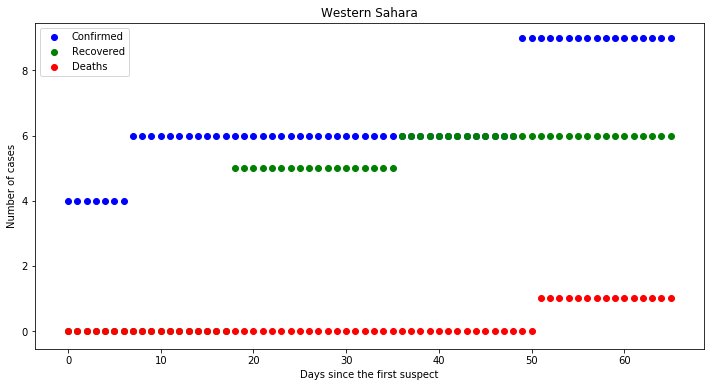

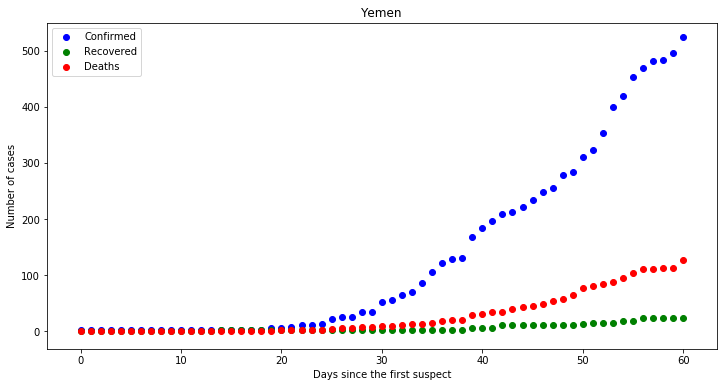

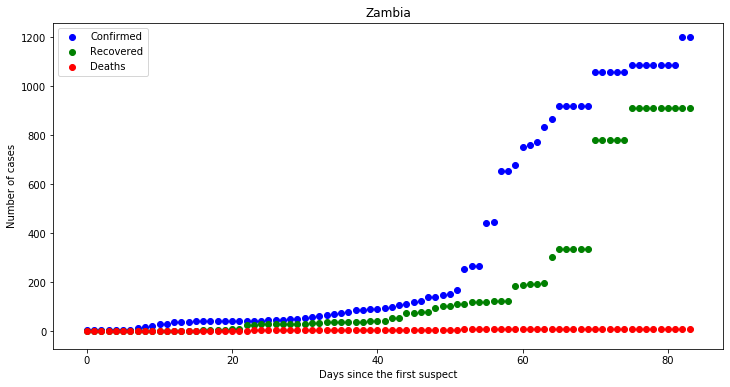

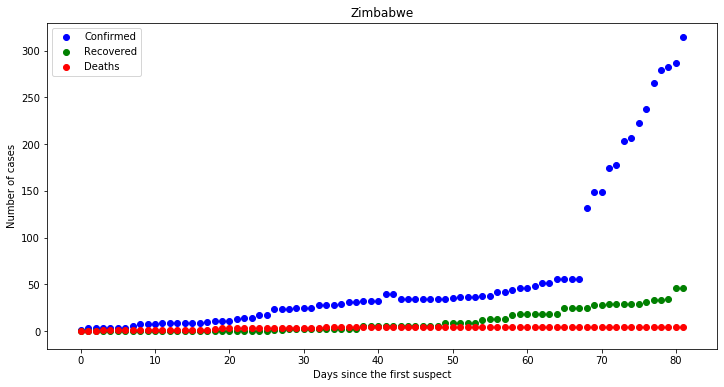

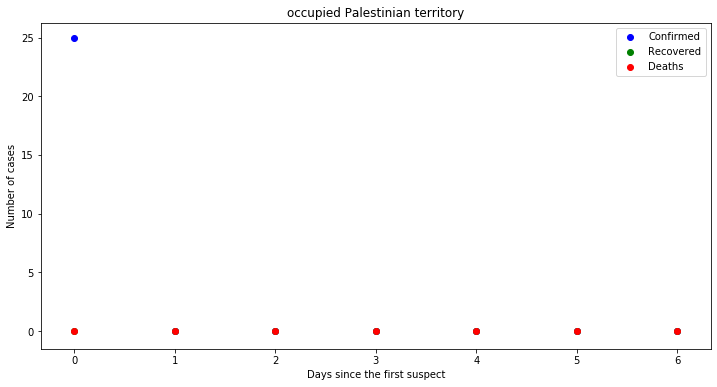

In [28]:
#for each country i want to see the trend of confirmed cases recovered cases and death cases
#because of the number of country we will loop through the countries

for idx in range(0,len(countries)):    
    C = df2[df2['Country']==countries[idx]].reset_index() 
    plt.figure(figsize=(12,6))
    plt.scatter(np.arange(0,len(C)),C['Confirmed'],color='blue',label='Confirmed')
    plt.scatter(np.arange(0,len(C)),C['Recovered'],color='green',label='Recovered')
    plt.scatter(np.arange(0,len(C)),C['Deaths'],color='red',label='Deaths')
    plt.title(countries[idx])
    plt.xlabel('Days since the first suspect')
    plt.ylabel('Number of cases')
    plt.legend()
    plt.show()  

In [24]:
# to Get world Data
df4 = df2.groupby(['Date'])[['Date','Confirmed','Deaths','Recovered']].sum().reset_index()

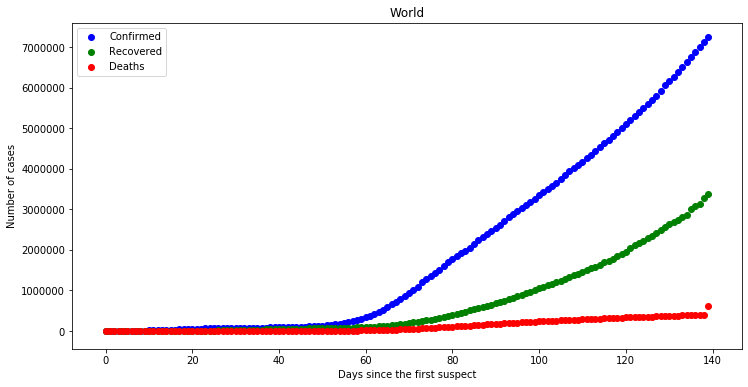

In [29]:
C = df4
plt.figure(figsize=(12,6))
plt.scatter(np.arange(0,len(C)),C['Confirmed'],color='blue',label='Confirmed')
plt.scatter(np.arange(0,len(C)),C['Recovered'],color='green',label='Recovered')
plt.scatter(np.arange(0,len(C)),C['Deaths'],color='red',label='Deaths')
plt.title('World')
plt.xlabel('Days since the first suspect')
plt.ylabel('Number of cases')
plt.legend()
plt.show()

In [1]:
git init

SyntaxError: invalid syntax (<ipython-input-1-f188d5ac1197>, line 1)